<font size="+4">Анализ оттока клиентов банка «Метанпром»</font>

Заказчик исследования — отдел маркетинга банка «Метанпром». Отдел маркетинга состоит из двух сотрудников: начальник отдела и линейный сотрудник.  
Заказчик отмечает, что в последнее время в банке повысился отток клиентов. Заказчик также заинтересован в том, чтобы удержать старых клиентов, т.к. расходы на мероприятия по удержанию клиента меньше, чем расходы на привлечение новых.  
В нашем распоряжении [датасет](#https://code.s3.yandex.net/datasets/bank_scrooge.csv) в котором содержатся данные о клиентах банка «Метанпром».  
Банк располагается в трёх городах: `Ярославле`, а также в областных городах `Ростов` и `Рыбинск`.  

Пожелание заказчика к содержанию исследования — понятные интерпретируемые графики, а также лаконичные и ёмкие выводы.  
Также в отделе маркетинга банка отсутствуют автоматизированные системы рассылок, письма каждому клиенту пишутся вручную. Поэтому для отдела маркетинга важно, чтобы были представлены компактные однородные сегменты клиентов, которые склонны уходить из банка и дать примеры мероприятий, которые можно провести, чтобы вернуть клиентов в банк или удержать сомневающихся от оттока.

<font size="+1">Ретроспектива</font>  
Ранее было проведено исследование оттока, и выделены сегменты, но клиентская база поменялась, и текущие решения не работают.

<font size="+1">Цель исследования</font>  
- Снизить отток клиентов банка.

<font size="+1">Задачи исследования</font>  
1. Загрузить датасет с данными о клиентах банка, ознакомиться с данными;
2. Произвести предобработку данных;
3. Выполнить исследовательский анализ данных:  
    1. Определить признаки отточности.
4. Проверить статистические гипотезы:  
    1. Гипотеза различия дохода между теми клиентами, которые ушли и теми, которые остались;  
    2. Сформулировать и проверить иные гипотезы.
5. Сформировать сегменты отточных клиентов опираясь на ранее сформированные признаки отточности и на результаты проверки гипотез;
6. Представить итоговые выводы. Выводы включают в себя:
    1. Список приоритезированных, наиболее отточных сегментов клиентов;
    2. Таргетированные по сегментам рекомендации для снижения оттока.

<font size="+1">Конечный результат исследования</font>  
- Определены сегменты клиентов (от 500 клиентов на сегмент) с наибольшим оттоком (чей отток выше среднего уровня оттока клиентов по банку);
- Даны приоритезированные, таргетированные по сегментам рекомендации для снижения оттока клиентов.

<font size="+2">Содержание</font><a id='content'></a>
1. [Обзор данных](#start)
2. [Предобработка данных](#prepare)
3. [Исследовательский анализ данных](#eda)
4. [Проверка статистических гипотез](#statistical_hypotheses)
5. [Промежуточные выводы. Выделение признаков влияющих на отток](#outflow_intermediate_conclusions)
6. [Формирование сегментов отточных клиентов](#churn_search_algorithm)
7. [Итоговые выводы исследования](#conclusion)ования

# Обзор данных <a id='start'></a>

In [1]:
!pip install phik

In [2]:
import pandas as pd
import seaborn as sns
import phik
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from scipy import stats as st
import math as mth

In [3]:
# Изменение параметра вывода строк датафреймов для вывода полных строк
pd.options.display.max_colwidth = 1

In [4]:
# Активация matplotlib стиля seaborn-darkgrid для диаграмм

plt.style.use('seaborn-darkgrid')

In [5]:
# чтение датасета через try except. Сначала предпринимается попытка прочитать датасет с локального расположения.
# В случае неудачи происходит загрузка датасета по url

try:
    df = pd.read_csv('local_dataset.csv')
except:
    df = pd.read_csv('url_to_dataset.csv')

In [6]:
df.head(5)  # Вывод первых 5 строк для первичного ознакомления с датасетом

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [7]:
df.tail(5)  # Вывод последних 5 строк для первичного ознакомления с датасетом

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0
9999,96267,828.0,Рыбинск,Ж,58.0,3,1180886.70,4,0,1,21422.37,0


Судя по первым и последним 5 записям датасета df, данные соотносятся с целями анализа. Данных для анализа достаточно.

In [8]:
# Обзор размеров датасета

df.shape

(10000, 12)

Всего в датасете 10000 записей и 12 столбцов.

## Описание столбцов датасета

- `USERID` — идентификатор пользователя;
- `score` — баллы кредитного скоринга;
- `city` — город;
- `gender` — пол;
- `age` — возраст;
- `equity` — количество баллов собственности;
- `balance` — баланс на счёте;
- `products` — количество продуктов, которыми пользуется клиент;
- `credit_card` — есть ли кредитная карта;
- `last_activity` — активный клиент;
- `EST_SALARY` — заработная плата клиента;
- `churn` — ушёл или нет.

Наименования столбцов `USERID` и `EST_SALARY` будут приведены к стилю snake_case при предобработке данных.

## Типы данных

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Типы данных в датасете корректны и не нуждаются в преобразовании к иному типу.

Категориальные данные:
- `USERID` — идентификатор пользователя;
- `city` — город;
- `gender` — пол;
- `credit_card` — есть ли кредитная карта;
- `last_activity` — активный клиент;
- `churn` — ушёл или нет.

Количественные дискретные данные:
- `equity` — количество баллов собственности;
- `products` — количество продуктов, которыми пользуется клиент.

Количественные непрерывные данные:
- `score` — баллы кредитного скоринга;
- `age` — возраст;
- `balance` — баланс на счёте;
- `EST_SALARY` — заработная плата клиента.

## Общая гистограмма <a id='common_hist'></a>

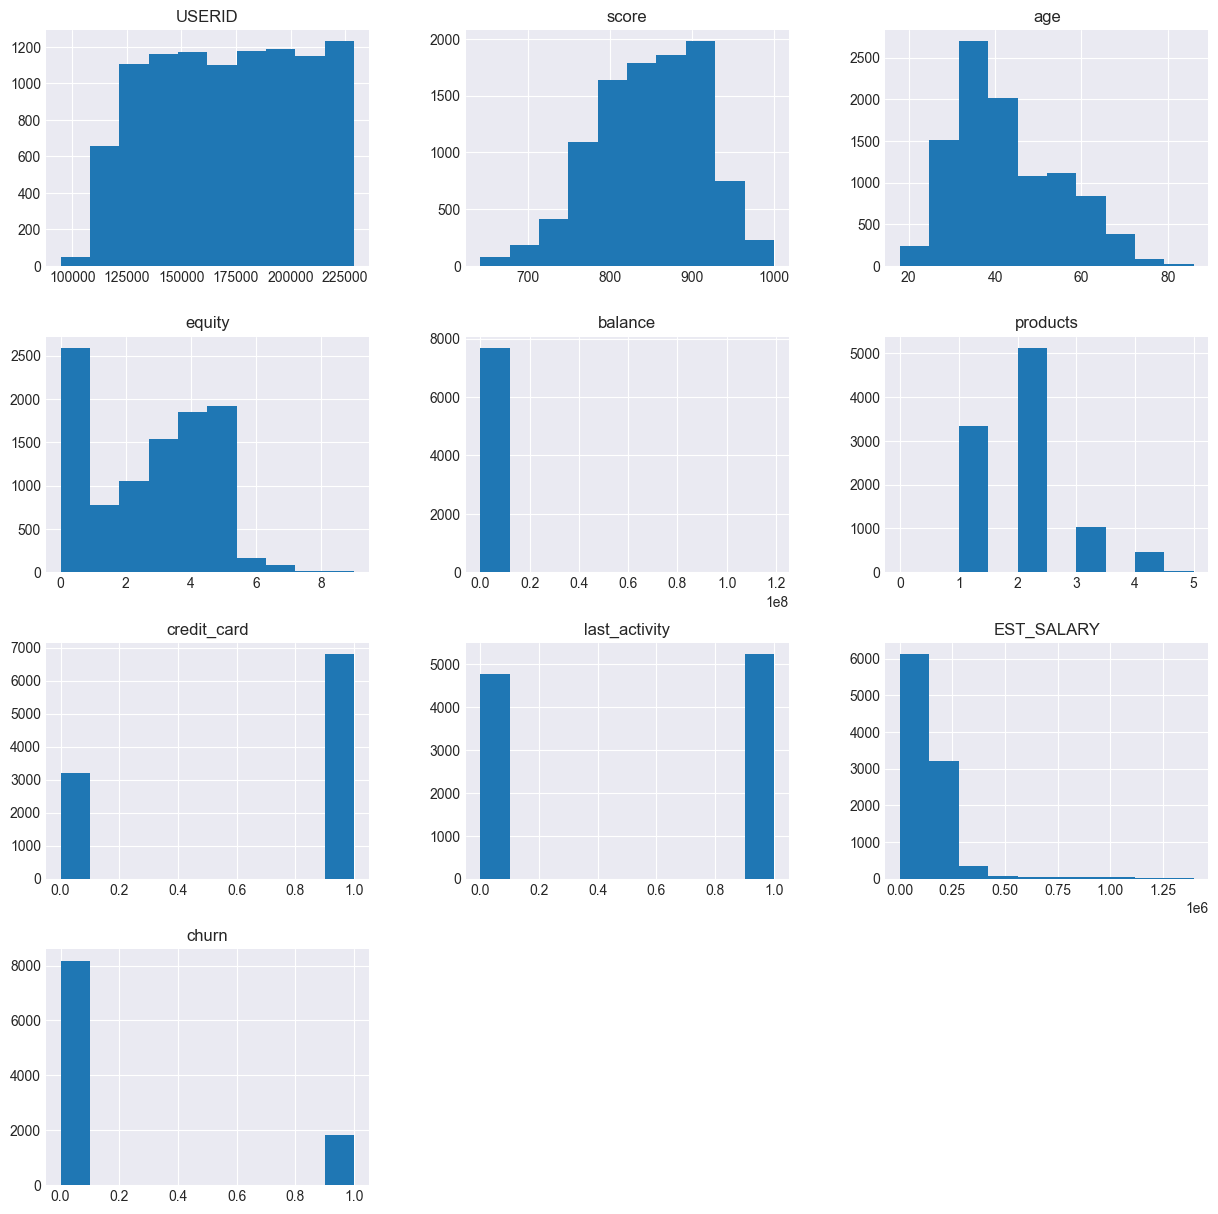

In [10]:
df.hist(figsize=(15, 15));

Согласно общей гистограмме можно сложить следующее первое представление:
- Большинство клиентов имеют от ~750 до ~930 баллов баллы кредитного скоринга;
- Большинство клиентов находятся в возрасте от ~25 до ~45 лет;
- По большей части клиенты имеют либо 0, либо от 3 до 5 баллов собственности;
- В балансе клиентов имеется сильный выброс;
- Чаще всего клиенты пользуются 2 или 1 продуктом банка;
- Клиентов с кредитными картами ~68%, без кредитных карт ~32%;
- Признаком активного клиента обладает ~52%, соответственно неактивных ~48%;
- В зарплате клиентов имеется сильный выброс;
- Ушли из банка ~18% клиентов, остаются клиентами банка ~82%.

## Обзор количественных данных <a id='describe'></a>

In [11]:
df.describe()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Обзор количественных данных позволяет убедиться в том, что в данных нет явных аномалий и позволяет сформировать общее представление о значениях.  
Также обзор подтверждает выводы сделанные по общей гистограмме и предоставляет новые данные:
- Возраст клиентов корректный: минимальный 18 лет, максимальный 86 лет;
- Баланс клиентов не опускается ниже 0;
- Средний и медианный показатели рейтинга и возраста близки между собой по значению, а потому эти значения имеют нормальное распределение;
- 75-й перцентиль баланса и зарплаты клиентов во много раз отличается от их максимума, что подтверждает большие выбросы в этих данных.

# Предобработка данных <a id='prepare'></a>

## Переименование столбцов

Приведём наименования столбцов `USERID` и `EST_SALARY` к стилю snake_case.

In [12]:
# Переименовываем столбцы

df = df.rename(columns={'USERID': 'user_id',
                        'EST_SALARY': 'est_salary'
                        })
# Выводим наименование столбцов, чтобы убедиться в корректности изменений

df.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

Столбцы успешно переименованы и теперь соответствуют стилю snake_case.

## Дубликаты

### Явные дубликаты

In [13]:
df.duplicated().sum()

0

Явные дубликаты отсутствуют.

### Неявные дубликаты

In [14]:
df['user_id'].duplicated().sum()

73

Имеется 73 дубликата по идентификатору клиента. Посмотрим на данные дубликаты:

In [15]:
# Показываем первые 10 полного набора записей-дубликатов по user_id

df[df['user_id'].duplicated(keep=False)].sort_values('user_id').head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
1411,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
8164,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0


Клиенты с одинаковыми `user_id` не имеют общих черт, соответственно это разные люди.  
Закономерность, которая объединяет данные дубли — это то что задублированные клиенты присутствуют в разных городах.  
Нет ни одного дубля одновременно по `user_id` и `city`:

In [16]:
df[df[['user_id', 'city']].duplicated(keep=False)].sort_values('user_id')['user_id'].count()

0

Клиенты с одинаковым `user_id` встречаются в двух городах из трёх, где представлен банк. Это города `Рыбинск` и `Ярославль`:

In [17]:
df[df['user_id'].duplicated(keep=False)].sort_values('user_id')['city'].unique()

array(['Рыбинск', 'Ярославль'], dtype=object)

По всей видимости, в результате какого-то дефекта в филиалах банка в `Рыбинск` и `Ярославль` возможно присвоение клиенту уже существующего в системе `user_id`. О данном явлении следует сообщить в отдел технической поддержки, чтобы они исправили данный дефект в дальнейшем.  
А сейчас, чтобы избавиться от дублей по `user_id` присвоим таким пользователям иные `user_id`. Новые `user_id` дадим по правилу `user_id * 10`. Это позволит дать дубликатам уникальные `user_id`, т.к. минимальный `user_id` дубликата равен `116540`, а максимальный до данной операции равен `229145`.

In [18]:
# Все задублированные user_id умножаем на 10

df.loc[df['user_id'].duplicated(), ['user_id']] = df.loc[df['user_id'].duplicated(), ['user_id']] * 10

Проверим наличие дубликатов:

In [19]:
df['user_id'].duplicated().sum()

0

Дубликатов в датафрейме более нет, при этом удалось сохранить записи всех клиентов.

## Поиск и обработка аномальных и выбивающихся значений

Первое представление по граничным значениям в данных мы уже получили в разделах [Общая гистограмма](#common_hist) и [Обзор количественных данных](#describe). Но пока не рассматривали такие категориальные данные, как город и пол.
Также стоит обратить внимание на клиентов с граничными значениями количества продуктов банка.

### Город

In [20]:
df['city'].value_counts()

Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64

Как и заявлялось ранее, присутствуют три города. Аномалий не обнаружено.

### Пол клиента

In [21]:
df['gender'].value_counts()

М    5005
Ж    4995
Name: gender, dtype: int64

Примерно равное распределение клиентов на два пола. Аномалий не обнаружено.

### Количество продуктов банка

In [22]:
df['products'].value_counts()

2    5126
1    3341
3    1039
4    474 
5    19  
0    1   
Name: products, dtype: int64

In [23]:
df[df['products'] == 0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


In [24]:
df[df['products'] == 5].head(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
401,187761,868.0,Ярославль,Ж,19.0,4,8126.88,5,1,1,85323.98,0
523,195914,852.0,Ярославль,Ж,39.0,5,1388255.70,5,1,1,135432.48,1
893,132781,820.0,Ярославль,М,37.0,5,259677.16,5,1,1,124261.01,0
1019,122402,833.0,Ростов,М,32.0,3,234560.94,5,1,1,106033.79,0
1346,159649,847.0,Ярославль,Ж,39.0,1,137974.02,5,1,1,219672.26,0


Аномалий не обнаружено.

## Пропуски

In [25]:
# Ищем строки с пропусками с помощью isna(), подчитываем их среднее кол-во и
# сортируем от большего к меньшему. В итоге отображается доля пропусков в столбцах

df.isna().mean().sort_values(ascending=False)

balance          0.2295
age              0.0026
user_id          0.0000
score            0.0000
city             0.0000
gender           0.0000
equity           0.0000
products         0.0000
credit_card      0.0000
last_activity    0.0000
est_salary       0.0000
churn            0.0000
dtype: float64

Пропуски содержатся в колонках с возрастом (0.26% пропусков) и балансом клиентов (22.95% пропусков).  
Для выяснения причин появления пропусков следует связаться с ответственными за выгрузку специалистами для установления причин их появления. Возможно, имеет место техническая ошибка на одном из этапов выгрузки и преобразования данных.  
Но пока попробуем разобраться в природе данных пропусков и подумаем что можно с ними сделать.

### Обработка пропусков в возрасте клиентов

Чтобы ответить на вопрос о том, распределены пропуски случайно или имеется зависимость от каких либо данных, создадим сводную таблицу, где по каждому признаку будет посчитана мера центральной тенденции.  
Для расчёта такой таблицы добавим столбец-признак `age_na`, принимающим 1, если в возрасте пропущено значение, и 0 если нет. А также напишем функцию расчёта таблицы и воспользуемся ей.

In [26]:
# Всем записям сначала присваиваем столбец age_na равный 0
# Затем, в случае если возраст в записи пропущен, присваем age_na значение 1

df['age_na'] = 0
df.loc[df['age'].isna(), ['age_na']] = 1

In [27]:
# В новом датафрейме na_dependency_df заполняем столбец "Значение пропущено" посчитанной мерой центральной 
# тендеции признаков для таких строк, где пропущено значение возраста. Значения округляются и приводятся к типу int.
# Столбец "Значение не пропущено" заполняется аналогично, только посчитанной мерой центральной тендеции признаков 
# для таких строк, где значение возраста не пропущено.
# Столбец "Относительная разница" заполняется значением 0 при создании датафрейма, расчёт производится после
# создания датафрейма na_dependency_df.

na_dependency_df = pd.DataFrame({'Значение пропущено':[df[df['age_na'] == 1]['score'].mean().round().astype('int'),
                                                       df[df['age_na'] == 1]['est_salary'].mean().round().astype('int'),
                                                       df[df['age_na'] == 1]['est_salary'].median().round().astype('int'),
                                                       df[df['age_na'] == 1]['balance'].mean().round().astype('int'),
                                                       df[df['age_na'] == 1]['balance'].median().round().astype('int'),
                                                       df[df['age_na'] == 1]['products'].median().astype('int'),
                                                       df[df['age_na'] == 1]['equity'].median().astype('int'),
                                                       df[df['age_na'] == 1]['city'].mode()[0],
                                                       df[df['age_na'] == 1]['gender'].mode()[0],
                                                       df[df['age_na'] == 1]['credit_card'].mode()[0],
                                                       df[df['age_na'] == 1]['last_activity'].mode()[0]],
                                 'Значение не пропущено':[df[df['age_na'] == 0]['score'].mean().round().astype('int'),
                                                          df[df['age_na'] == 0]['est_salary'].mean().round().astype('int'),
                                                          df[df['age_na'] == 0]['est_salary'].median().round().astype('int'),
                                                          df[df['age_na'] == 0]['balance'].mean().round().astype('int'),
                                                          df[df['age_na'] == 0]['balance'].median().round().astype('int'),
                                                          df[df['age_na'] == 0]['products'].median().astype('int'),
                                                          df[df['age_na'] == 0]['equity'].median().astype('int'),
                                                          df[df['age_na'] == 0]['city'].mode()[0],
                                                          df[df['age_na'] == 0]['gender'].mode()[0],
                                                          df[df['age_na'] == 0]['credit_card'].mode()[0],
                                                          df[df['age_na'] == 0]['last_activity'].mode()[0]],
                                 'Относительная разница':[0] * 11},
                                index = ['Средний кредитный скоринга',
                                         'Средняя зарплата',
                                         'Медианная зарплата',
                                         'Средний баланс',
                                         'Медианный баланс',
                                         'Медианное количество продуктов',
                                         'Медианное количество баллов собственности',
                                         'Мода по городу',
                                         'Мода по полу',
                                         'Мода по наличию кредитной карты',
                                         'Мода по активности клиента'])

# Расчёт относительной разницы для средних и медианных значений. Разница умножается на 100, округляется до второго знака
# после запятой, приводится к типу str и добавляется знак процента для лучшей визуализации

for i in range(7):
    na_dependency_df.iloc[i, 2] = round((na_dependency_df.iloc[i, 0] - na_dependency_df.iloc[i, 1]) / na_dependency_df.iloc[i, 1] * 100, 2).astype('str') + '%'

# Расчёт относительной разницы для значений моды. 0%, если разницы нет, 100%, если есть

for i in range(7,11):
    na_dependency_df.iloc[i, 2] = '0%' if na_dependency_df.iloc[i, 0] == na_dependency_df.iloc[i, 1] else '100.0%'

na_dependency_df

,Значение пропущено,Значение не пропущено,Относительная разница
Средний кредитный скоринга,855,849,0.71%
Средняя зарплата,178585,147787,20.84%
Медианная зарплата,142599,119627,19.2%
Средний баланс,1250034,827246,51.11%
Медианный баланс,417361,524295,-20.4%
Медианное количество продуктов,1,2,-50.0%
Медианное количество баллов собственности,0,3,-100.0%
Мода по городу,Ярославль,Ярославль,0%
Мода по полу,М,М,0%
Мода по наличию кредитной карты,1,1,0%


Согласно полученной таблице можно отметить, что у записей, где пропущен возраст значительно больше среднее значение баланса, а медианное меньше. Это говорит о том, что среди клиентов, где баланс пропущен присутствует большой выброс по значению баланса.  
Также у клиентов с пропущенным возрастом баллы собственности равны 0, и меньше продуктов относительно записей, где возраст не пропущен.  
Пропуски возраста относятся к типу `MNAR (Missing Not At Random / Отсутствует не случайно)`, т.к. пропуски зависят от данных (при этом больше всего от баллов собственности), но их можно удалить, т.к. записей с пропуском возраста всего 0.26% от общего числа записей.

Удалим записи, где пропущен возраст и столбец `age_na` за ненадобностью.

In [28]:
# Оставляем в датафрейме только те записи, где возраст заполнен
df = df[df['age_na'] == 0]

# Удаляем из датафрейма столбец age_na
df = df.drop(columns='age_na')

# Проверка изменений
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   float64
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1013.0+ KB


В датафрейме более нет строк с пропущенным возрастом клиентов.

### Обработка пропусков в балансе клиентов <a id ='balance_na'></a>

Создадим сводную таблицу, аналогичную той, что строили для записей где был пропущен возраст.

In [29]:
# Всем записям сначала присваиваем столбец balance_na равный 0
# Затем, в случае если возраст в записи пропущен, присваем balance_na значение 1

df['balance_na'] = 0
df.loc[df['balance'].isna(), ['balance_na']] = 1

In [30]:
# В новом датафрейме na_dependency_df заполняем столбец "Значение пропущено" посчитанной мерой центральной 
# тендеции признаков для таких строк, где пропущено значение баланса. Значения округляются и приводятся к типу int.
# Столбец "Значение не пропущено" заполняется аналогично, только посчитанной мерой центральной тендеции признаков 
# для таких строк, где значение баланса не пропущено.
# Столбец "Относительная разница" заполняется значением 0 при создании датафрейма, расчёт производится после
# создания датафрейма na_dependency_df.

na_dependency_df = pd.DataFrame({'Значение пропущено':[df[df['balance_na'] == 1]['score'].mean().round().astype('int'),
                                                       df[df['balance_na'] == 1]['age'].mean().round().astype('int'),
                                                       df[df['balance_na'] == 1]['est_salary'].mean().round().astype('int'),
                                                       df[df['balance_na'] == 1]['est_salary'].median().round().astype('int'),
                                                       df[df['balance_na'] == 1]['products'].median().astype('int'),
                                                       df[df['balance_na'] == 1]['equity'].median().astype('int'),
                                                       df[df['balance_na'] == 1]['city'].mode()[0],
                                                       df[df['balance_na'] == 1]['gender'].mode()[0],
                                                       df[df['balance_na'] == 1]['credit_card'].mode()[0],
                                                       df[df['balance_na'] == 1]['last_activity'].mode()[0]],
                                 'Значение не пропущено':[df[df['balance_na'] == 0]['score'].mean().round().astype('int'),
                                                          df[df['balance_na'] == 0]['age'].mean().round().astype('int'),
                                                          df[df['balance_na'] == 0]['est_salary'].mean().round().astype('int'),
                                                          df[df['balance_na'] == 0]['est_salary'].median().round().astype('int'),
                                                          df[df['balance_na'] == 0]['products'].median().astype('int'),
                                                          df[df['balance_na'] == 0]['equity'].median().astype('int'),
                                                          df[df['balance_na'] == 0]['city'].mode()[0],
                                                          df[df['balance_na'] == 0]['gender'].mode()[0],
                                                          df[df['balance_na'] == 0]['credit_card'].mode()[0],
                                                          df[df['balance_na'] == 0]['last_activity'].mode()[0]],
                                 'Относительная разница':[0] * 10},
                                index = ['Средний кредитный рейтинг',
                                         'Средний возраст',
                                         'Средняя зарплата',
                                         'Медианная зарплата',
                                         'Медианное количество продуктов',
                                         'Медианное количество баллов собственности',
                                         'Мода по городу',
                                         'Мода по полу',
                                         'Мода по наличию кредитной карты',
                                         'Мода по активности клиента'])

# Расчёт относительной разницы для средних и медианных значений. Разница умножается на 100, округляется до второго знака
# после запятой, приводится к типу str и добавляется знак процента для лучшей визуализации

for i in range(6):
    na_dependency_df.iloc[i, 2] = round((na_dependency_df.iloc[i, 0] - na_dependency_df.iloc[i, 1]) / na_dependency_df.iloc[i, 1] * 100, 2).astype('str') + '%'

# Расчёт относительной разницы для значений моды. 0%, если разницы нет, 100%, если есть

for i in range(6,10):
    na_dependency_df.iloc[i, 2] = '0%' if na_dependency_df.iloc[i, 0] == na_dependency_df.iloc[i, 1] else '100.0%'

na_dependency_df

,Значение пропущено,Значение не пропущено,Относительная разница
Средний кредитный рейтинг,865,844,2.49%
Средний возраст,42,43,-2.33%
Средняя зарплата,226345,124520,81.77%
Медианная зарплата,174348,106250,64.09%
Медианное количество продуктов,1,2,-50.0%
Медианное количество баллов собственности,0,4,-100.0%
Мода по городу,Ярославль,Ярославль,0%
Мода по полу,М,Ж,100.0%
Мода по наличию кредитной карты,1,1,0%
Мода по активности клиента,1,1,0%


Между записями где пропущен и заполнен баланс присутствуют сильные различия в мерах центральных тенденций. У записей с отсутствующим балансом значительно выше зарплата, сильно меньше медианное кол-во собственности и есть различия по полу.  
Пропуски баланса относятся к типу `MNAR (Missing Not At Random / Отсутствует не случайно)`, т.к. пропуски сильно зависят от данных и их нельзя удалить, т.к. записей с пропуском баланса всего 22.95% от общего числа записей. Возможно баланс отсутствует у новых клиентов, которые начали пользоваться услугами банка совсем недавно. В пользу этой версии говорят два факта. У клиентов с пропущенным балансом по сравнению с клиентами у которых баланс указан:
- Меньшее кол-во продуктов банка;
- Во много раз [меньше показатель отточности](#balance_na_percent). Вероятно, клиенты у которых баланс не указан, стали клиентами банка совсем недавно и в базе данных откуда был получен датасет ещё нет сведений о балансе.

Посмотрим на то, как коррелирует баланс клиентов к остальным параметрам. Для начала посмотрим на корреляцию Пирсона.

In [31]:
# Срез столбцов исключает из корреляции столбец user_id

df.iloc[:, 1:13].corr(method='pearson')['balance'].sort_values(ascending=False)

balance          1.000000
est_salary       0.338800
score            0.235283
equity           0.163793
churn            0.085915
products         0.075716
age              0.069745
last_activity    0.024770
credit_card     -0.059850
balance_na      NaN      
Name: balance, dtype: float64

Наибольшую корреляцию на баланс показывает доход клиента, однако она является умеренной. Проверим данный вывод также на корреляции методом `phik()`, который базируется на подсчете хи-квадрат статистики.

In [32]:
# Срез столбцов исключает из корреляции столбец user_id
# В параметре interval_cols передаётся информация о том, какие столцы
# следует считать непрерывными количественными данными

phik_overview = df.iloc[:, 1:].phik_matrix(interval_cols=['score', 'age', 'balance', 'est_salary'])
phik_overview['balance'].sort_values(ascending=False)

balance          1.000000
est_salary       0.374366
score            0.170887
gender           0.045434
city             0.039931
age              0.024989
churn            0.024672
equity           0.000000
products         0.000000
credit_card      0.000000
last_activity    0.000000
balance_na      NaN      
Name: balance, dtype: float64

Данный метод подсчёта также подтверждает, что наибольшую корреляцию на баланс показывает доход клиента, и она по-прежнему является умеренной.

Пропуски в балансе клиентов не будут заполнены средними значениями, т.к. это может сильно исказить результаты исследования, как показала сводная таблица с посчитанными мерами центральной тенденции. Удалены записи с пропусками баланса также не будут, т.к. записей с пропуском баланса 22.95% от общего числа.

## Выводы по результатам предобработки

Произведён первичный осмотр датасета, наименования столбцов приведены к формату snake_case.  
Явные дубликаты не обнаружены. Обработаны неявные дубликаты по `user_id`, дубликатам даны новые `user_id`, т.к. судя по данным, это разные клиенты.  
Аномальных и выбивающихся значений не обнаружено.  
Удалены записи клиентов с пропусками в возрасте. Записи с пропусками в балансе клиентов оставлены без изменений.

# Исследовательский анализ данных <a id='eda'></a>

## Среднее значение отточности для всех клиентов

In [33]:
common_churn_percent = round(df['churn'].mean() * 100, 2)
common_churn_percent

18.24

Среднее значение отточности клиентов составляет 18.24%. При дальнейшем анализе будем выделять такие интервалы признаков клиентов, при которых значение отточности будет выше, чем в среднем по банку.

## Матрица корреляций <a id='matrix'></a>

Построим матрицу корреляций между всеми данными в датасете.

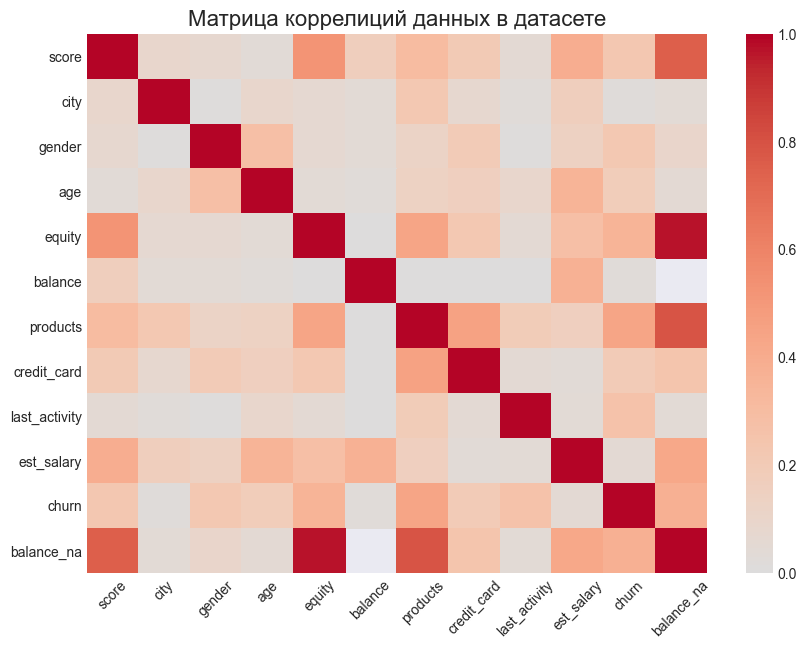

In [34]:
fig = plt.figure(figsize=(10, 7))

sns.heatmap(phik_overview,
            cmap='coolwarm',
            center=0)

plt.xticks(rotation=45)
plt.title('Матрица коррелиций данных в датасете', fontsize=16)
plt.show()

С признаком оттока с умеренной силой коррелируют `количество продуктов банка` — `products`, признак `пропуска баланса` — `balance_na` и `количеством баллов собственности` — `equity`.  
Слабо с признаком оттока коррелируют `признак активности` — `last_activity`, `баллы кредитного скоринга` — `score`, `пол` — `gender`, `наличие кредитной карты` — `credit_card` и `возраст` — `age`.  
Остальные признаки не коррелируют с признаком оттока.

Также в матрице корреляций заметна сильная корреляция признака пропуска баланса с `количеством баллов собственности` — `equity`, `баллами кредитного скоринга` — `score` и `количеством продуктов банка` — `products`.

### Корреляция признака оттока к остальным признакам клиента в численном выражении <a id='phik'></a>

In [35]:
phik_overview['churn'].sort_values(ascending=False)

churn            1.000000
products         0.440923
balance_na       0.380486
equity           0.352103
last_activity    0.262164
score            0.228080
gender           0.219731
credit_card      0.202374
age              0.182538
est_salary       0.048803
balance          0.024672
city             0.016431
Name: churn, dtype: float64

Численное выражение корреляции оттока к остальным признакам даёт точные данные о значении корреляции и подтверждает сделанные ранее выводы.

## Поиск отточных признаков путём анализа распределения <a id='distribution'></a>

Анализ распределения отточных клиентов будем проводить с теми признаками, которые имеют умеренную или слабую корреляцию. Потому распределение отточных клиентов по признакам зарплаты, баланса и города рассмотрены не будут.

### Распределения категориальных признаков

#### Признак пропуска баланса <a id='balance_na_percent'></a>

Ранее в разделе [Обработка пропусков в балансе клиентов](#balance_na) был добавлен столбец `balance_na`, который принимает значение 0, когда у клиента заполнен баланс и 1, когда баланс пропущен. Признак пропуска баланса [показал умеренную корреляцию](#phik) с признаком оттока, поэтому посмотрим также и его распределение совместно с признаком отточности клиентов.

In [36]:
# Группировка признака пропуска баланса и отточности клиентов. Аггрегируем кол-во клиентов по
# признаку отточности и считаем количество клиентов у которых баланс есть и у которых пропущен
churn_vs_balance_na = df.groupby('balance_na').agg({'churn': 'sum', 'balance_na': 'count'})

# Переименовываем колонки, чтобы они отражали суть содержимого и чтобы они имели уникальные имена
churn_vs_balance_na = churn_vs_balance_na.rename(columns={'balance_na': 'balance_na_count',
                                                          'churn': 'churn_sum'
                                                          })

# Избаляемся от второго уровня наименований колонок
churn_vs_balance_na = churn_vs_balance_na.reset_index()

# Вычисление процента отточности для клиентов у которых баланс есть и у которых пропущен
churn_vs_balance_na['churn_percent'] = round(churn_vs_balance_na['churn_sum'] / churn_vs_balance_na['balance_na_count'] * 100, 2)
churn_vs_balance_na

,balance_na,churn_sum,balance_na_count,churn_percent
0,0,1806,7695,23.47
1,1,13,2279,0.57


Построим диаграмму на основе процента отточности для клиентов у которых баланс есть и у которых он пропущен.

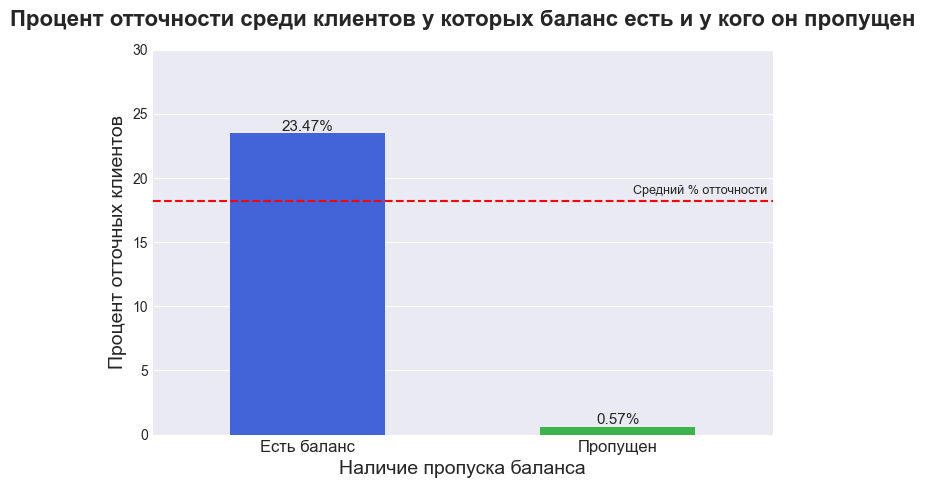

In [37]:
# Палитра для диаграмм
colors = ['#4363d8', '#3cb44b', '#ffe119', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabed4', '#469990']

ax = (churn_vs_balance_na['churn_percent'].plot(kind = 'bar',
                                                figsize = (8,5),
                                                color=colors))

ax.tick_params(labelrotation=0)
ax.set_ylabel('Процент отточных клиентов').set_fontsize(14)
ax.set_ylim([0, 30])
ax.set_xlabel('Наличие пропуска баланса').set_fontsize(14)
ax.set_xticklabels(['Есть баланс', 'Пропущен'], fontsize=12)
ax.grid(axis='x')

for x, y, p in zip(churn_vs_balance_na['churn_percent'].index, churn_vs_balance_na['churn_percent'], list(churn_vs_balance_na['churn_percent'])):
    plt.text(x, y, str(p) + '%', ha='center', va='bottom', fontsize=11)

plt.axhline(y=common_churn_percent, color='red', linestyle ='dashed')
ax.text(x=1.05, y=common_churn_percent * 1.03, s='Средний % отточности', fontsize=9)

plt.title('Процент отточности среди клиентов у которых баланс есть и у кого он пропущен', fontweight='bold', y=1.04, fontsize=16)
plt.show()

Клиенты у которых есть значение баланса значительно чаще уходят из банка, чем те у кого он пропущен. Процент уходящих клиентов с заполненным балансом больше среднего по банку.  
Вероятно, клиенты у которых баланс не указан, стали клиентами банка совсем недавно и в базе данных откуда был получен датасет ещё нет сведений о балансе.

#### Признак активности 

Сгруппируем признак активности и признак отточности клиентов, чтобы посмотреть распределение.

In [38]:
# Группировка признака активности и отточности клиентов. Аггрегируем кол-во клиентов по
# признаку отточности и считаем количество клиентов разной активности
churn_vs_last_activity = df.groupby('last_activity').agg({'churn': 'sum', 'last_activity': 'count'})

# Переименовываем колонки, чтобы они отражали суть содержимого и чтобы они имели уникальные имена
churn_vs_last_activity = churn_vs_last_activity.rename(columns={'last_activity': 'last_activity_count',
                                                                'churn': 'churn_sum'
                                                               })

# Избаляемся от второго уровня наименований колонок
churn_vs_last_activity = churn_vs_last_activity.reset_index()

# Вычисление процента отточности для клиентов различной активности
churn_vs_last_activity['churn_percent'] = round(churn_vs_last_activity['churn_sum'] / churn_vs_last_activity['last_activity_count'] * 100, 2)
churn_vs_last_activity

,last_activity,churn_sum,last_activity_count,churn_percent
0,0,542,4759,11.39
1,1,1277,5215,24.49


Построим диаграмму на основе процента отточности для клиентов различной активности.

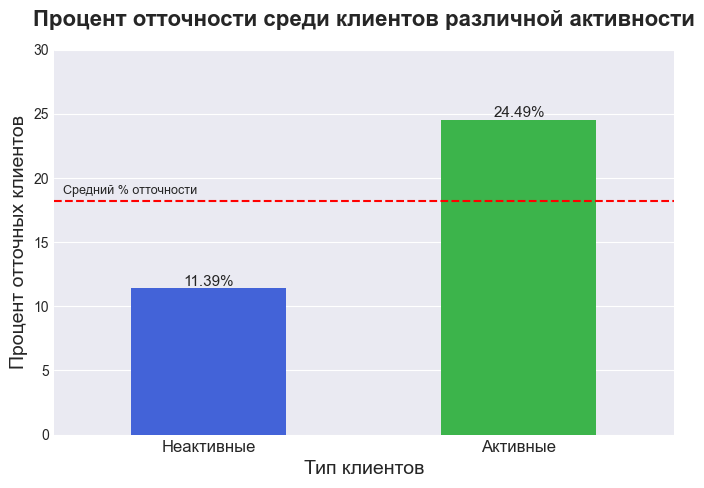

In [39]:
ax = (churn_vs_last_activity['churn_percent'].plot(kind = 'bar',
                                                   figsize = (8,5),
                                                   color=colors))

ax.tick_params(labelrotation=0)
ax.set_ylabel('Процент отточных клиентов').set_fontsize(14)
ax.set_ylim([0, 30])
ax.set_xlabel('Тип клиентов').set_fontsize(14)
ax.set_xticklabels(['Неактивные', 'Активные'], fontsize=12)
ax.grid(axis='x')

for x, y, p in zip(churn_vs_last_activity['churn_percent'].index, churn_vs_last_activity['churn_percent'], list(churn_vs_last_activity['churn_percent'])):
    plt.text(x, y, str(p) + '%', ha='center', va='bottom', fontsize=11)

plt.axhline(y=common_churn_percent, color='red', linestyle ='dashed')
ax.text(x=-0.47, y=common_churn_percent * 1.03, s='Средний % отточности', fontsize=9)

plt.title('Процент отточности среди клиентов различной активности', fontweight='bold', y=1.04, fontsize=16)
plt.show()

Активные клиенты чаще уходят из банка, чем неактивные и среднестатистические клиенты.

#### Пол

Сгруппируем пол и признак отточности клиентов, чтобы посмотреть распределение.

In [40]:
# Группировка пола и отточности клиентов. Аггрегируем кол-во клиентов по
# признаку отточности и считаем количество клиентов разного пола
churn_vs_gender = df.groupby('gender').agg({'churn': 'sum', 'gender': 'count'})

# Переименовываем колонки, чтобы они отражали суть содержимого и чтобы они имели уникальные имена
churn_vs_gender = churn_vs_gender.rename(columns={'gender': 'gender_count',
                                                  'churn': 'churn_sum'
                                                  })

# Избаляемся от второго уровня наименований колонок
churn_vs_gender = churn_vs_gender.reset_index()

# Вычисление процента отточности для клиентов разного пола
churn_vs_gender['churn_percent'] = round(churn_vs_gender['churn_sum'] / churn_vs_gender['gender_count'] * 100, 2)
churn_vs_gender

,gender,churn_sum,gender_count,churn_percent
0,Ж,636,4983,12.76
1,М,1183,4991,23.70


Построим диаграмму на основе процента отточности для клиентов различного пола.

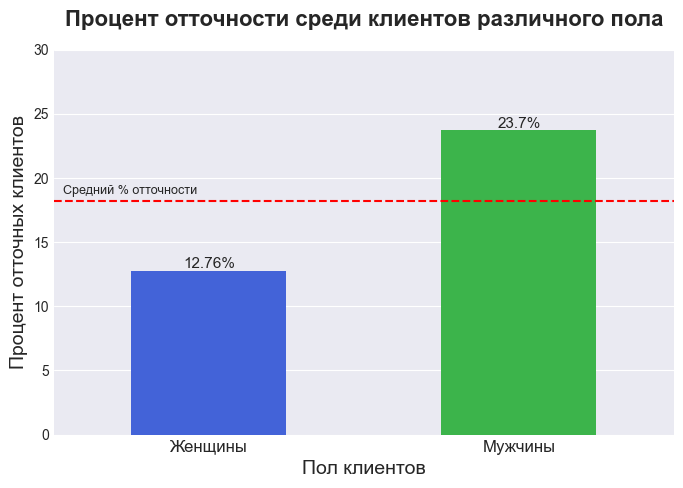

In [41]:
ax = (churn_vs_gender['churn_percent'].plot(kind = 'bar',
                                            figsize = (8,5),
                                            color=colors))

ax.tick_params(labelrotation=0)
ax.set_ylabel('Процент отточных клиентов').set_fontsize(14)
ax.set_ylim([0, 30])
ax.set_xlabel('Пол клиентов').set_fontsize(14)
ax.set_xticklabels(['Женщины', 'Мужчины'], fontsize=12)
ax.grid(axis='x')

for x, y, p in zip(churn_vs_gender['churn_percent'].index, churn_vs_gender['churn_percent'], list(churn_vs_gender['churn_percent'])):
    plt.text(x, y, str(p) + '%', ha='center', va='bottom', fontsize=11)

plt.axhline(y=common_churn_percent, color='red', linestyle ='dashed')
ax.text(x=-0.47, y=common_churn_percent * 1.03, s='Средний % отточности', fontsize=9)

plt.title('Процент отточности среди клиентов различного пола', fontweight='bold', y=1.04, fontsize=16)
plt.show()

Мужчины уходят из банка чаще женщин. Также процент уходящих мужчин больше среднего по банку.

#### Наличие кредитной карты

Сгруппируем признак наличия кредитной карты банка и признак отточности клиентов, чтобы посмотреть распределение.

In [42]:
# Группировка признака наличия кредитной карты банка и отточности клиентов. Аггрегируем кол-во клиентов по
# признаку отточности и считаем количество клиентов с кредитной картой и без
churn_vs_credit_card = df.groupby('credit_card').agg({'churn': 'sum', 'credit_card': 'count'})

# Переименовываем колонки, чтобы они отражали суть содержимого и чтобы они имели уникальные имена
churn_vs_credit_card = churn_vs_credit_card.rename(columns={'credit_card': 'credit_card_count',
                                                                'churn': 'churn_sum'
                                                               })

# Избаляемся от второго уровня наименований колонок
churn_vs_credit_card = churn_vs_credit_card.reset_index()

# Вычисление процента отточности для клиентов с кредитной картой и без
churn_vs_credit_card['churn_percent'] = round(churn_vs_credit_card['churn_sum'] / churn_vs_credit_card['credit_card_count'] * 100, 2)
churn_vs_credit_card

,credit_card,churn_sum,credit_card_count,churn_percent
0,0,816,3190,25.58
1,1,1003,6784,14.78


Построим диаграмму на основе процента отточности для клиентов с кредитной картой банка и без неё.

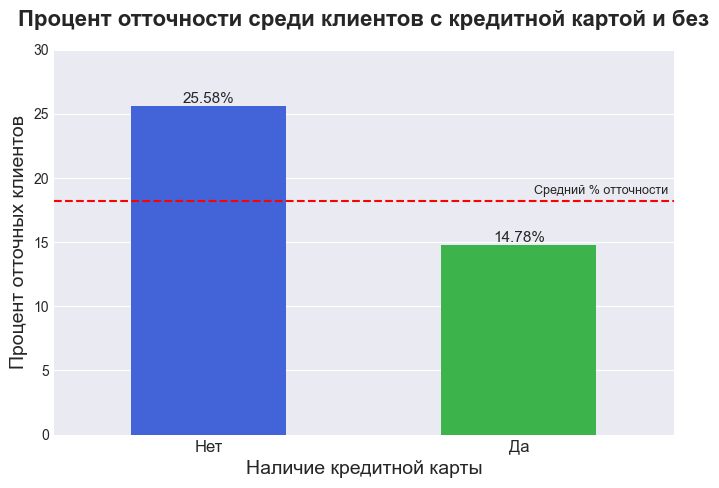

In [43]:
ax = (churn_vs_credit_card['churn_percent'].plot(kind = 'bar',
                                            figsize = (8,5),
                                            color=colors))

ax.tick_params(labelrotation=0)
ax.set_ylabel('Процент отточных клиентов').set_fontsize(14)
ax.set_ylim([0, 30])
ax.set_xlabel('Наличие кредитной карты').set_fontsize(14)
ax.set_xticklabels(['Нет', 'Да'], fontsize=12)
ax.grid(axis='x')

for x, y, p in zip(churn_vs_credit_card['churn_percent'].index, churn_vs_credit_card['churn_percent'], list(churn_vs_credit_card['churn_percent'])):
    plt.text(x, y, str(p) + '%', ha='center', va='bottom', fontsize=11)

plt.axhline(y=common_churn_percent, color='red', linestyle ='dashed')
ax.text(x=1.05, y=common_churn_percent * 1.03, s='Средний % отточности', fontsize=9)

plt.title('Процент отточности среди клиентов с кредитной картой и без', fontweight='bold', y=1.04, fontsize=16)
plt.show()

Клиенты без кредитной карты уходят из банка чаще. Также процент уходящих клиентов без кредитной карты больше среднего по банку.  
Это ещё один аргумент в пользу увеличения процента клиентов имеющих кредитную карту.

### Распределения количественных дискретных признаков

#### Количество продуктов

Сгруппируем признак активности и количество продуктов клиентов, чтобы посмотреть распределение.

In [44]:
# Группировка признака пропуска баланса и отточности клиентов. Аггрегируем кол-во клиентов по
# признаку отточности и считаем количество клиентов у которых баланс есть и у которых пропущен
churn_vs_products = df.groupby('products').agg({'churn': 'sum', 'products': 'count'})

# Переименовываем колонки, чтобы они отражали суть содержимого и чтобы они имели уникальные имена
churn_vs_products = churn_vs_products.rename(columns={'products': 'products_count',
                                                      'churn': 'churn_sum'
                                                      })

# Избаляемся от второго уровня наименований колонок
churn_vs_products = churn_vs_products.reset_index()

# Вычисление процента отточности для клиентов у которых баланс есть и у которых пропущен
churn_vs_products['churn_percent'] = round(churn_vs_products['churn_sum'] / churn_vs_products['products_count'] * 100, 2)

churn_vs_products

,products,churn_sum,products_count,churn_percent
0,0,1,1,100.00
1,1,235,3323,7.07
2,2,978,5119,19.11
3,3,297,1038,28.61
4,4,300,474,63.29
5,5,8,19,42.11


Построим диаграмму на основе процента отточности для клиентов с разным количеством продуктов.  
Клиенты с 0 продуктами рассматриваться не будут, т.к. такой клиент лишь один.

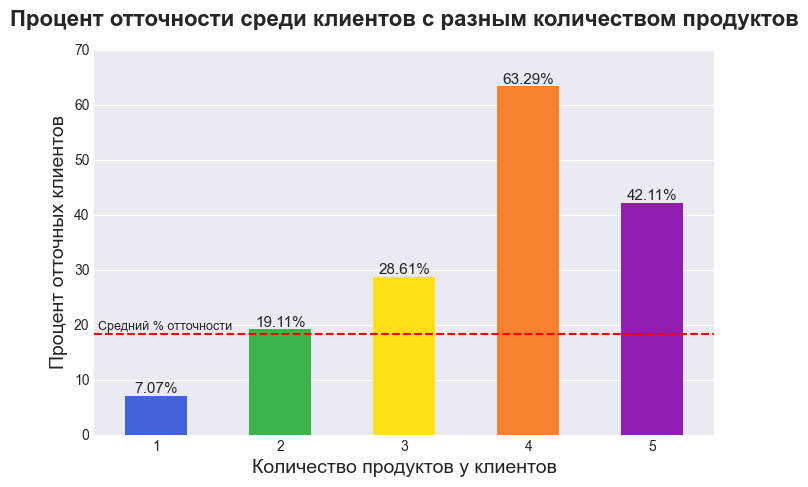

In [45]:
ax = (churn_vs_products.iloc[1:]['churn_percent'].plot(kind = 'bar',
                                                       figsize = (8,5),
                                                       color=colors))

ax.tick_params(labelrotation=0)
ax.set_ylabel('Процент отточных клиентов').set_fontsize(14)
ax.set_ylim([0, 70])
ax.set_xlabel('Количество продуктов у клиентов').set_fontsize(14)
ax.grid(axis='x')

for x, y, p in zip(churn_vs_products.iloc[1:]['churn_percent'].index - 1, churn_vs_products.iloc[1:]['churn_percent'], list(churn_vs_products.iloc[1:]['churn_percent'])):
    plt.text(x, y, str(p) + '%', ha='center', va='bottom', fontsize=11)

plt.axhline(y=common_churn_percent, color='red', linestyle ='dashed')
ax.text(x=-0.47, y=common_churn_percent * 1.04, s='Средний % отточности', fontsize=9)

plt.title('Процент отточности среди клиентов с разным количеством продуктов', fontweight='bold', y=1.04, fontsize=16)
plt.show()

Клиенты с 1 и 2 продуктами имеют процент отточности ниже или примерно равный среднему проценту отточности по банку.  
Клиенты с более чем 2 продуктами показывают уровень отточности выше среднего. При этом, самый высокий уровень отточности у клиентов с 4 продуктами.

На диаграмме выше можно заметить зависимость уровня отточности клиентов от количества баллов продуктов — чем больше продуктов, тем выше уровень оттока. Исключение составляют клиенты с 5 продуктами, но в случае с такими клиентами недостаточно данных для выводов, т.к. таких клиентов всего 19, т.е. выборка слишком мала.

#### Количество баллов собственности

Сгруппируем признак активности и количество баллов собственности клиентов, чтобы посмотреть распределение.

In [46]:
# Группировка признака пропуска баланса и отточности клиентов. Аггрегируем кол-во клиентов по
# признаку отточности и считаем количество клиентов у которых баланс есть и у которых пропущен
churn_vs_equity = df.groupby('equity').agg({'churn': 'sum', 'equity': 'count'})

# Переименовываем колонки, чтобы они отражали суть содержимого и чтобы они имели уникальные имена
churn_vs_equity = churn_vs_equity.rename(columns={'equity': 'equity_count',
                                                      'churn': 'churn_sum'
                                                      })

# Избаляемся от второго уровня наименований колонок
churn_vs_equity = churn_vs_equity.reset_index()

# Вычисление процента отточности для клиентов у которых баланс есть и у которых пропущен
churn_vs_equity['churn_percent'] = round(churn_vs_equity['churn_sum'] / churn_vs_equity['equity_count'] * 100, 2)

churn_vs_equity

,equity,churn_sum,equity_count,churn_percent
0,0,90,2576,3.49
1,1,93,773,12.03
2,2,166,1051,15.79
3,3,322,1541,20.90
4,4,464,1847,25.12
5,5,576,1915,30.08
6,6,58,161,36.02
7,7,37,80,46.25
8,8,6,17,35.29
9,9,7,13,53.85


Построим диаграмму на основе процента отточности для клиентов с разным количеством баллов собственности.

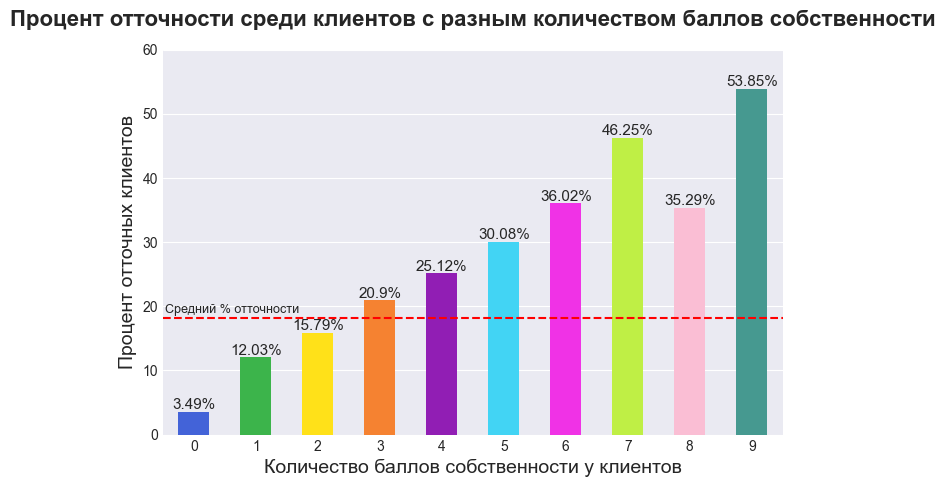

In [47]:
ax = (churn_vs_equity['churn_percent'].plot(kind = 'bar',
                                                          figsize = (8,5),
                                                          color=colors))

ax.tick_params(labelrotation=0)
ax.set_ylabel('Процент отточных клиентов').set_fontsize(14)
ax.set_ylim([0, 60])
ax.set_xlabel('Количество баллов собственности у клиентов').set_fontsize(14)
ax.grid(axis='x')

for x, y, p in zip(churn_vs_equity['churn_percent'].index, churn_vs_equity['churn_percent'], list(churn_vs_equity['churn_percent'])):
    plt.text(x, y, str(p) + '%', ha='center', va='bottom', fontsize=11)

plt.axhline(y=common_churn_percent, color='red', linestyle ='dashed')
ax.text(x=-0.47, y=common_churn_percent * 1.04, s='Средний % отточности', fontsize=9)

plt.title('Процент отточности среди клиентов с разным количеством баллов собственности', fontweight='bold', y=1.04, fontsize=16)
plt.show()

Клиенты с разным количеством баллов собственности разделились по среднему проценту отточности по банку следующим образом:
- Клиенты с `0-2 баллами` имеют процент отточности ниже среднего;
- Клиенты с `3 баллами` показывают уровень отточности примерно равный среднему;
- Клиенты с `4-9 баллами` имеют процент отточности выше среднего.

На диаграмме выше можно заметить зависимость уровня отточности клиентов от количества баллов собственности — чем больше баллов, тем выше уровень оттока.

### Распределения количественных непрерывных признаков

#### Баллы кредитного скоринга

Построим диаграмму с распределением отточных и неотточных клиентов к баллам кредитного скоринга.

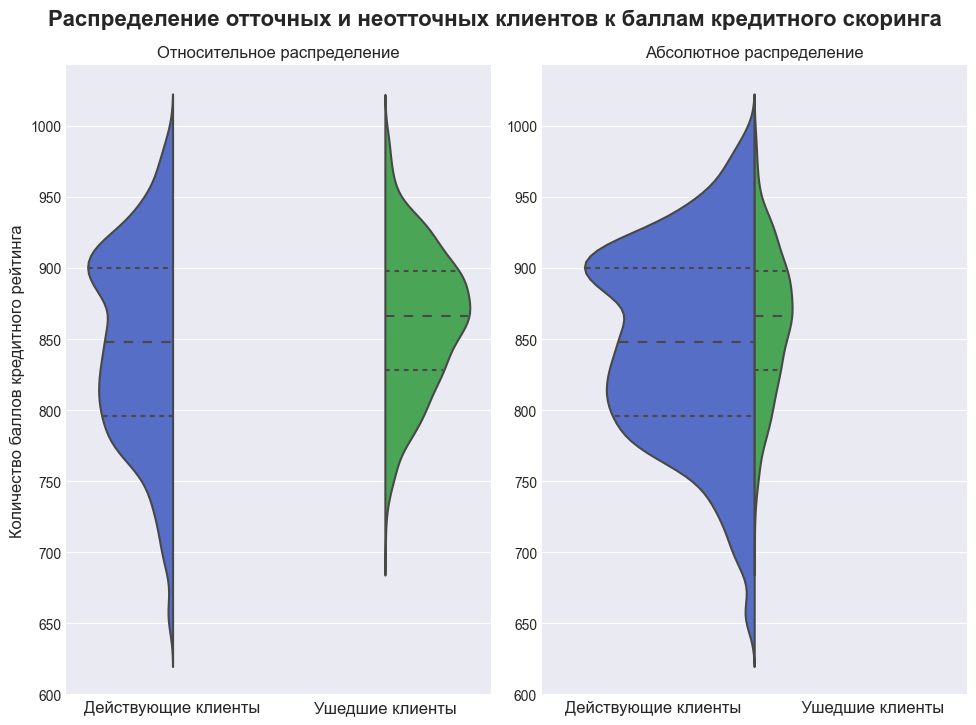

In [48]:
fig = plt.figure(figsize=(10, 7))

fig.add_subplot(1, 2, 1)
ax = sns.violinplot(x='churn', y='score',
              data=df,
              scale='count',
              hue='churn',
              split=True,
              palette=colors,
              inner='quartile',
             )

ax.set_title('Относительное распределение')
ax.set_ylabel('Количество баллов кредитного рейтинга').set_fontsize(12)
ax.set_xlabel('')
ax.set_xticklabels(['Действующие клиенты', 'Ушедшие клиенты'], fontsize=12)
plt.legend([],[], frameon=False)

fig.add_subplot(1, 2, 2)
ax = sns.violinplot(x=["AB"]*len(df), y='score',
              data=df,
              scale='count',
              hue='churn',
              split=True,
              palette=colors,
              inner='quartile')

ax.set_title('Абсолютное распределение')
ax.set_ylabel('')
ax.set_xticklabels(['Действующие клиенты             Ушедшие клиенты'], fontsize=12)

plt.tight_layout()
plt.suptitle('Распределение отточных и неотточных клиентов к баллам кредитного скоринга', fontweight='bold', y=1.03, fontsize=16)
plt.legend([],[], frameon=False)

plt.show()

Ушедшие клиенты в среднем обладают большим количеством баллов кредитного рейтинга, чем действующие.  
Половина ушедших клиентов, расположившихся между 1-м и 3-м квартилем, обладает рейтингом от 830 до 900 баллов. Большая часть ушедших клиентов обладает рейтингом `от 800 до 930`.

#### Возраст

Построим диаграмму с распределением отточных и неотточных клиентов к их возрасту.

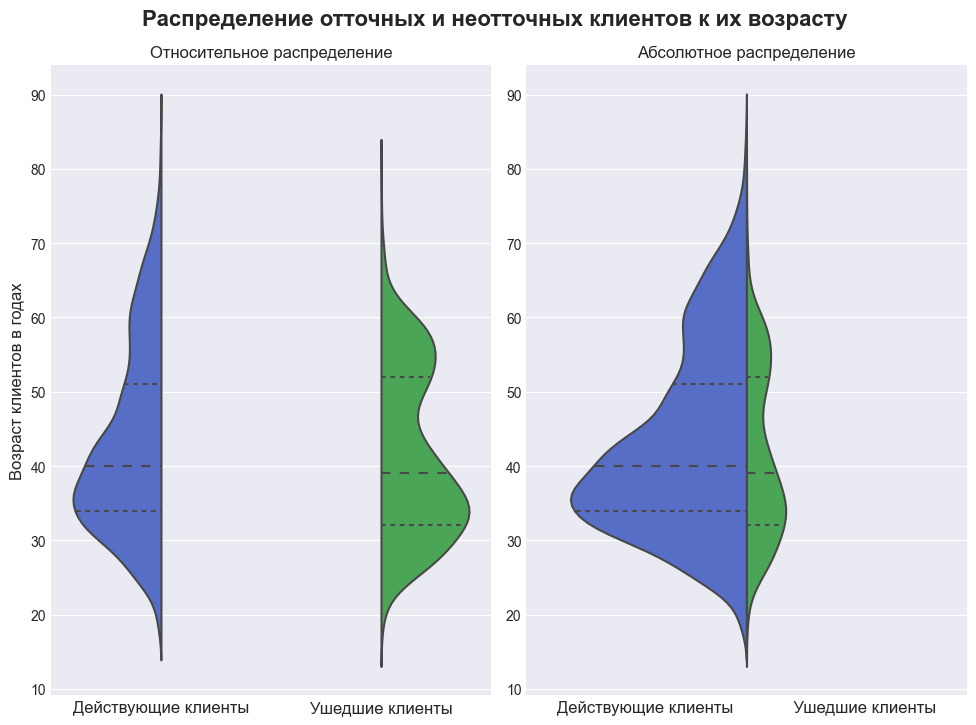

In [49]:
fig = plt.figure(figsize=(10, 7))

fig.add_subplot(1, 2, 1)
ax = sns.violinplot(x='churn', y='age',
              data=df,
              scale='count',
              hue='churn',
              split=True,
              palette=colors,
              inner='quartile',
             )

ax.set_title('Относительное распределение')
ax.set_ylabel('Возраст клиентов в годах').set_fontsize(12)
ax.set_xlabel('')
ax.set_xticklabels(['Действующие клиенты', 'Ушедшие клиенты'], fontsize=12)
plt.legend([],[], frameon=False)

fig.add_subplot(1, 2, 2)
ax = sns.violinplot(x=["AB"]*len(df), y='age',
              data=df,
              scale='count',
              hue='churn',
              split=True,
              palette=colors,
              inner='quartile')

ax.set_title('Абсолютное распределение')
ax.set_ylabel('')
ax.set_xticklabels(['Действующие клиенты             Ушедшие клиенты'], fontsize=12)

plt.tight_layout()
plt.suptitle('Распределение отточных и неотточных клиентов к их возрасту', fontweight='bold', y=1.03, fontsize=16)
plt.legend([],[], frameon=False)

plt.show()

Ушедшие клиенты в среднем немного моложе действующих.  
Половина ушедших клиентов, расположившихся между 1-м и 3-м квартилем, пребывает в возрасте от 32 до 52 лет.  
В распределении ушедших клиентов можно отметить две вершины, где возраст равен 33 и 55 годам. Если принимать это во внимание, то большая часть ушедших клиентов находится в двух диапазонах возраста — `26-43` и `50-58` лет.

## Анализ портрета клиента в разрезе оттока <a id='portrait'></a>

Посмотрим портрет клиента в разрезе оттока. Для этого построим сводную таблицу, где по каждому признаку будет посчитана мера центральной тенденции.

In [50]:
# В новом датафрейме churn_dependency_df заполняем столбец "Ушедший клиент" посчитанной мерой центральной 
# тендеции признаков для таких строк, значение churn равно 1. Значения округляются и приводятся к типу int.
# Столбец "Действующий клиент" заполняется аналогично, только посчитанной мерой центральной тендеции признаков 
# для таких строк, где значение churn равно 0.
# Столбец "Относительная разница" заполняется значением 0 при создании датафрейма, расчёт производится после
# создания датафрейма churn_dependency_df.

churn_dependency_df = pd.DataFrame({'Ушедший клиент':[df[df['churn'] == 1]['score'].mean().round().astype('int'),
                                                      df[df['churn'] == 1]['age'].mean().round().astype('int'),
                                                      df[df['churn'] == 1]['est_salary'].mean().round().astype('int'),
                                                      df[df['churn'] == 1]['est_salary'].median().round().astype('int'),
                                                      df[df['churn'] == 1]['balance'].mean().round().astype('int'),
                                                      df[df['churn'] == 1]['balance'].median().round().astype('int'),
                                                      df[df['churn'] == 1]['products'].median().astype('int'),
                                                      df[df['churn'] == 1]['equity'].median().astype('int'),
                                                      df[df['churn'] == 1]['city'].mode()[0],
                                                      df[df['churn'] == 1]['gender'].mode()[0],
                                                      df[df['churn'] == 1]['credit_card'].mode()[0],
                                                      df[df['churn'] == 1]['last_activity'].mode()[0]],
                                    'Действующий клиент':[df[df['churn'] == 0]['score'].mean().round().astype('int'),
                                                          df[df['churn'] == 0]['age'].mean().round().astype('int'),
                                                          df[df['churn'] == 0]['est_salary'].mean().round().astype('int'),
                                                          df[df['churn'] == 0]['est_salary'].median().round().astype('int'),
                                                          df[df['churn'] == 0]['balance'].mean().round().astype('int'),
                                                          df[df['churn'] == 0]['balance'].median().round().astype('int'),
                                                          df[df['churn'] == 0]['products'].median().astype('int'),
                                                          df[df['churn'] == 0]['equity'].median().astype('int'),
                                                          df[df['churn'] == 0]['city'].mode()[0],
                                                          df[df['churn'] == 0]['gender'].mode()[0],
                                                          df[df['churn'] == 0]['credit_card'].mode()[0],
                                                          df[df['churn'] == 0]['last_activity'].mode()[0]],
                                    'Относительная разница':[0] * 12},
                                   index = ['Средний кредитный рейтинг',
                                            'Средний возраст',
                                            'Средняя зарплата',
                                            'Медианная зарплата',
                                            'Средний баланс',
                                            'Медианный баланс',
                                            'Медианное количество продуктов',
                                            'Медианное количество баллов собственности',
                                            'Мода по городу',
                                            'Мода по полу',
                                            'Мода по наличию кредитной карты',
                                            'Мода по активности клиента'])

# Расчёт относительной разницы для средних и медианных значений. Разница умножается на 100, округляется до второго знака
# после запятой, приводится к типу str и добавляется знак процента для лучшей визуализации

for i in range(8):
    churn_dependency_df.iloc[i, 2] = round((churn_dependency_df.iloc[i, 0] - churn_dependency_df.iloc[i, 1]) / churn_dependency_df.iloc[i, 1] * 100, 2).astype('str') + '%'

# Расчёт относительной разницы для значений моды. 0%, если разницы нет, 100%, если есть

for i in range(8,12):
    churn_dependency_df.iloc[i, 2] = '0%' if churn_dependency_df.iloc[i, 0] == churn_dependency_df.iloc[i, 1] else '100.0%'

churn_dependency_df

,Ушедший клиент,Действующий клиент,Относительная разница
Средний кредитный рейтинг,863,845,2.13%
Средний возраст,41,43,-4.65%
Средняя зарплата,148290,147675,0.42%
Медианная зарплата,125395,118228,6.06%
Средний баланс,1134458,733032,54.76%
Медианный баланс,783909,475410,64.89%
Медианное количество продуктов,2,2,0.0%
Медианное количество баллов собственности,4,3,33.33%
Мода по городу,Ярославль,Ярославль,0%
Мода по полу,М,Ж,100.0%


Ушедшие клиенты по сравнению с действующими:
- Имеют больший баланс (однако корреляции отточности к балансу нет);
- Чаще являются мужчинами;
- Чаще являются активными клиентами;
- Имеют немного больше баллов собственности.

## Выводы по результатам исследовательского анализа данных

В ходе исследовательского анализа была построена [матрица корреляций](#matrix), которая позволила установить, что с признаком оттока коррелируют следующие данные:
- С умеренной силой:
    - Количество продуктов банка — products;
    - Признак пропуска баланса — balance_na;
    - Количество баллов собственности — equity.
- Слабо коррелируют:
    - Признак активности — last_activity;
    - Баллы кредитного скоринга — score;
    - Пол — gender;
    - Наличие кредитной карты — credit_card;
    - Возраст — age.
- Остальные признаки не коррелируют с признаком оттока.

По вышеперечисленным признакам были [построены распределения](#distribution), по которым можно дать характеристики наиболее отточным клиентам в разрезе признаков. Чаще остальных из банка уходят клиенты у которых:
- Значение баланса не пустое;
- С признаком активности;
- Мужской пол;
- Без кредитной карты;
- С более чем 2 продуктами;
- С 4-9 баллами собственности;
- С кредитным рейтингом от 800 до 930;
- В двух диапазонах возраста — 26-43 и 50-58 лет.

Построен портрет клиента в разрезе оттока. Ушедшие клиенты согласно портрету:
- Имеют больший баланс (однако корреляции отточности к балансу нет);
- Чаще являются мужчинами;
- Чаще являются активными клиентами;
- Имеют немного больше баллов собственности.

Перечисленные пункты за исключением баланса ранее подтвердились при построении распределений.

# Проверка статистических гипотез <a id='statistical_hypotheses'></a>

## Гипотеза №1. Доходы ушедших и действующих клиентов отличаются между собой

Для проверки утверждения "доходы ушедших и действующих клиентов отличаются между собой", сформулируем нулевую и альтернативную гипотезы:
- Нулевая гипотеза: "Доходы ушедших и действующих клиентов не отличаются";
- Альтернативная гипотеза: "Доходы ушедших и действующих клиентов отличаются между собой".

Для проверки гипотезы воспользуемся t-тестом, метод `scipy.stats.ttest_ind()`, т.к. он работает для выборки любого размера.  
Чтобы убедится в том, что мы можем в данном случае применить t-тест, рассмотрим три аспекта:
1. Генеральные совокупности не должны зависеть друг от друга:
    - <font color='green'>В данном случае они независимы, в обеих совокупностях рассматриваются разные клиенты.</font>
2. Выборочные средние должны быть нормально распределены:
    - <font color='green'>Благодаря ЦПТ, т.к. размер выборки составляет более тысячи значений, выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности.</font>
3. Дисперсии рассматриваемых генеральных совокупностей должны быть равны:
    - <font color='green'>Т.к. выборки разного размера и можно предположить, что дисперсии у генеральных совокупностей разные, в методе `scipy.stats.ttest_ind()` укажем параметр `equal_var=False`.</font>

Критический уровень статистической значимости примем равным 5%.  

Проверим гипотезу о равенстве доходов ушедших и действующих клиентов.

In [51]:
# Доходы действующих клиентов
actual_clients_salary = df[df['churn'] == 0]['est_salary']

# Доходы ушедших клиентов
gone_clients_salary = df[df['churn'] == 1]['est_salary']

# Критический уровень статистической значимости
alpha = 0.05

# Проведение статистического теста о равенстве доходов ушедших и действующих клиентов
results = st.ttest_ind(actual_clients_salary, gone_clients_salary, equal_var=False)

# Получившееся значение p-value
print('p-значение:', results.pvalue.round(3))

# Сравнение получившегося p-value с alpha
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.852
Не получилось отвергнуть нулевую гипотезу


Не нашлось причин отвергнуть нулевую гипотезу, считаем что доходы ушедших и действующих клиентов не отличаются.

## Гипотеза №2. Пропорции ушедших клиентов в городах различаются между собой

Для проверки утверждения "пропорции ушедших клиентов в городах различаются между собой" проверим гипотезу о равенстве долей при помощи Z-теста в различных городах. Так как банк расположен в трех городах, необходимо провести три проверки гипотезы для различных городов.

Сформулируем нулевую и альтернативную гипотезы:
- Нулевая гипотеза: "Пропорции ушедших клиентов в городах равны";
- Альтернативная гипотеза: "Пропорции ушедших клиентов в городах отличаются между собой".

Критический уровень статистической значимости примем равным 5%.  

Для проверки гипотезы о равенстве пропорций ушедших клиентов в различных городах напишем метод `ztest_for_churn`.

In [52]:
def ztest_for_churn(criterion, criterion_value_1, criterion_value_2):
    '''
    Метод производит тест пропорций ушедших клиентов на равенство при помощи Z-теста.
    На вход подаются критерий проверки и его значения, которые нужно проверить на равенство.
    '''
    # Критический уровень статистической значимости
    alpha = 0.05
    
    # Количество ушедших клиентов согласно первому критерию
    criterion_1_gone_clients_count = df[(df['churn'] == 1) & (df[criterion] == criterion_value_1)]['user_id'].count()
    
    # Количество действующих клиентов согласно первому критерию
    criterion_1_actual_clients_count = df[(df['churn'] == 0) & (df[criterion] == criterion_value_1)]['user_id'].count()
    
    # Количество ушедших клиентов согласно второму критерию
    criterion_2_gone_clients_count = df[(df['churn'] == 1) & (df[criterion] == criterion_value_2)]['user_id'].count()
    
    # Количество действующих клиентов согласно второму критерию
    criterion_2_actual_clients_count = df[(df['churn'] == 0) & (df[criterion] == criterion_value_2)]['user_id'].count()
    
    # Пропорция ушедших клиентов для первого критерия
    p1 = criterion_1_gone_clients_count/criterion_1_actual_clients_count
    print(f'Пропорция ушедших клиентов для значения {criterion_value_1} равна {p1.round(3)}')
    
    # Пропорция ушедших клиентов для второго критерия
    p2 = criterion_2_gone_clients_count/criterion_2_actual_clients_count
    print(f'Пропорция ушедших клиентов для значения {criterion_value_2} равна {p2.round(3)}')
    
    # Пропорция ушедших клиентов в комбинированном датасете
    p_combined = (criterion_1_gone_clients_count + criterion_2_gone_clients_count) / (criterion_1_actual_clients_count + criterion_2_actual_clients_count)
    
    # Разница пропорций в датасетах
    difference = p1 - p2
    
    # Считаем статистику в стандартных отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/criterion_1_actual_clients_count + 1/criterion_2_actual_clients_count))
    
    # Задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)
    
    # Вероятность получить такое отличие или больше
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print('p-значение: ', p_value.round(3))
    
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу'
        ) 

### Ярославль и Ростов

In [53]:
ztest_for_churn('city', 'Ярославль', 'Ростов')

Пропорция ушедших клиентов для значения Ярославль равна 0.235
Пропорция ушедших клиентов для значения Ростов равна 0.23
p-значение:  0.745
Не получилось отвергнуть нулевую гипотезу


Не нашлось причин отвергнуть нулевую гипотезу, считаем что пропорции ушедших клиентов в Ярославле и Ростове равны.

### Ярославль и Рыбинск

In [54]:
ztest_for_churn('city', 'Ярославль', 'Рыбинск')

Пропорция ушедших клиентов для значения Ярославль равна 0.235
Пропорция ушедших клиентов для значения Рыбинск равна 0.195
p-значение:  0.0
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, считаем что пропорции ушедших клиентов в Ярославле и Рыбинске не равны. В Ярославле пропорция ушедших клиентов больше, чем в Рыбинске.

### Ростов и Рыбинск

In [55]:
ztest_for_churn('city', 'Ростов', 'Рыбинск')

Пропорция ушедших клиентов для значения Ростов равна 0.23
Пропорция ушедших клиентов для значения Рыбинск равна 0.195
p-значение:  0.015
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, считаем что пропорции ушедших клиентов в Ростове и Рыбинске не равны. В Ростове пропорция ушедших клиентов больше, чем в Рыбинске.

## Выводы по результатам проверок статистических гипотез

В ходе проверок статистических гипотез установлено следующее:
- Доходы ушедших и действующих клиентов не отличаются;
- В Ярославле и Ростове ушедших клиентов пропорционально больше, чем в Рыбинске. При этом в Ярославле и Ростове одинаковые пропорции ушедших клиентов.

# Промежуточные выводы. Выделение признаков влияющих на отток <a id='outflow_intermediate_conclusions'></a>

По результатам исследовательского анализа, корреляции и статистических гипотез можно выделить признаки, которые лягут в основу сегментации отточных клиентов. Отточным клиентам присущи следующие признаки:
- Значение баланса не пустое;
- С признаком активности;
- Мужской пол;
- Без кредитной карты;
- С более чем 2 продуктами;
- С 4-9 баллами собственности;
- С кредитным рейтингом от 800 до 930;
- В двух диапазонах возраста — 26-43 и 50-58 лет;
- Проживают в Ярославле или Ростове.

Данные отточные признаки не нуждаются в ранжировании по влиянию на отток, т.к. при формировании отточных сегментов будут проверены все сочетания признаков.

# Формирование сегментов отточных клиентов <a id='churn_search_algorithm'></a>

Формирование отточных сегментов клиентов будет построено по следующему алгоритму:
1. Клиенты с признаками влияющими на отток определёнными в [промежуточных выводах](#outflow_intermediate_conclusions), как влияющие на отток, помещаются в отдельные датафреймы;
2. Датафреймы из шага 1 записываются в словари, где ключом будет название признака определяющее датафрейм, а значением сам датафрейм;
3. Словари из шага 2 записываются в список outflow_signs;
4. Создаётся пустой датафрейм segments с колонками `Сегмент`, `Количество признаков в сегменте`, `Количество клиентов`, `Процент отточности` для записи отточных сегментов;
5. В цикле перебирается сочетание двух признаков из списка outflow_signs созданного на шаге 3:
    1. Записи из двух датафреймов объединяются в один;
    2. Из полученного датафрейма сохраняются только дубликаты (значения, что находятся на пересечении признаков);
    3. Если на таком пересечении признаков есть 500 и более не ушедших клиентов, то данные этого пересечения записываются в датафрейм segments.
6. Проверяется первые 10 строк датафрейма segments отсортированного по убыванию процента оттока;
7. Шаги 5 и 6 повторяются с увеличением сочетания признаков (три, четыре и т.д.), пока будут находиться сегменты с сочетанием признаков удовлетворяющим условию;
8. Для получения сегментов с наивысшим процентом отточности уменьшить диапазон для признаков с непрерывными величинами (кредитный рейтинг, возраст) и повторять шаги 1-7 до тех пор, пока сегменты будут удовлетворять условию по минимальному количеству клиентов в сегменте.

Таким образом будут найдены самые отточные сегменты, т.к. будут проверены и проранжированы сочетания всех признаков влияющих на отток.

Поместим в отдельные датафреймы, а затем в словари признаки влияющие на отток.

In [56]:
# Клиенты с не пустым балансом
balance_not_na_clients = df[df['balance_na'] == 0]
dict_balance_not_na_clients = {'Не пустой баланс': balance_not_na_clients}

# Клиенты с признаком активности
active_clients = df[df['last_activity'] == 1]
dict_active_clients = {'Признак активности равен 1': active_clients}

# Клиенты мужского пола
men_clients = df[df['gender'] == 'М']
dict_men_clients = {'Мужской пол': men_clients}

# Клиенты без кредитной карты
not_credit_card_clients = df[df['credit_card'] == 0]
dict_not_credit_card_clients = {'Нет кредитной карты': not_credit_card_clients}

# Клиенты с более чем 2 продуктами
more_than_2_products_clients = df[df['products'] > 2]
dict_more_than_2_products_clients = {'Более 2 продуктов': more_than_2_products_clients}

# Клиенты с 4-9 баллами собственности
more_than_3_equity_clients = df[df['equity'] > 3]
dict_more_than_3_equity_clients = {'Больше 3 баллов собственности': more_than_3_equity_clients}

# Клиенты с кредитным рейтингом от 807 до 926
score_between_807_and_926_clients = df[(df['score'] >= 807) & (df['score'] <= 926)]
dict_score_between_807_and_926_clients = {'Кредитный рейтинг от 807 до 926': score_between_807_and_926_clients}

# Клиенты в возрасте от 26-43 и 51-57 лет
age_26_to_46_and_51_to_57_clients = df[((df['age'] >= 26) & (df['age'] <= 43)) | ((df['age'] >= 51) & (df['age'] <= 57))]
dict_age_26_to_46_and_51_to_57_clients = {'Возраст от 26-43 и 51-57 лет': age_26_to_46_and_51_to_57_clients}

# Клиенты проживающие в Ярославле или Ростове
yaroslavl_or_rostov_clients = df[(df['city'] == 'Ярославль') | (df['city'] == 'Ростов')]
dict_yaroslavl_or_rostov_clients = {'Город Ярославль или Ростов': yaroslavl_or_rostov_clients}

Словари запишем в список для перебора в цикле в дальнейшем.

In [57]:
outflow_signs = [dict_balance_not_na_clients,
                 dict_active_clients,
                 dict_men_clients,
                 dict_not_credit_card_clients,
                 dict_more_than_2_products_clients,
                 dict_more_than_3_equity_clients,
                 dict_score_between_807_and_926_clients,
                 dict_age_26_to_46_and_51_to_57_clients,
                 dict_yaroslavl_or_rostov_clients]

Создадим пустой датафрейм segments для записи отточных сегментов.

In [58]:
segments = pd.DataFrame(columns=['Сегмент', 'Количество признаков', 'Количество клиентов','Процент отточности сегмента', 'Разница процента отточности базового и сегмента'])

## Перебор сочетаний признаков для формирования сегментов

### Сегменты с двумя признаками

Переберём сочетание двух признаков из списка outflow_signs и запишем отточные сегменты удовлетворяющие условию `количество клиентов 500 и более` в датафрейм segments.

In [59]:
# счётчик для подсчёта найденных сегментов
count = 0

# цикл для перебора признаков и формирования сегментов
for i in range(0, len(outflow_signs) - 1):
    for j in range(1, len(outflow_signs)):
        
        # Условие для перебора только уникальных сочетаний признаков
        if i == j or i > j:
            continue
        
        # Записи из двух датафреймов с признаками оттока объединяются в один датафрейм segment
        segment = (
            list(outflow_signs[i].values())[0]
                                 .append(list(outflow_signs[j].values())[0],
                                         ignore_index=False)
            )
        
        # Из полученного датафрейма segment сохраняются только дубликаты (значения, что находятся на пересечении признаков)
        segment = segment[segment.duplicated()]
        
        # Получаем датафрейм segment_actual_clients с действующими клиентами банка
        segment_actual_clients = segment[segment['churn'] == 0]
        
        # Если действующих клиентов банка в полученном сегменте 500 и более, то записываем характеристики сегмента в датафрейм segments
        if segment_actual_clients.shape[0] >= 500:
            count += 1
            segments.loc[len(segments.index)] = ['"' + list(outflow_signs[i].keys())[0] + '"'    # Наименование сегмента
                                                 + ' И ' 
                                                 + '"' + list(outflow_signs[j].keys())[0] + '"',
                                                     2,                                          # Кол-во признаков в сегменте
                                                     segment_actual_clients.shape[0],            # Кол-во клиентов в сегменте
                                                     round(segment['churn'].mean() * 100, 2),    # % отточности сегмента
                                                     # Разница базового % отточности и % сегмента
                                                     round(segment['churn'].mean() * 100, 2) - common_churn_percent]       
            
print(f'Найдено сегментов: {count}')

Найдено сегментов: 34


Выведем первые 10 строк датафрейма segments отсортированного по убыванию процента оттока.

In [60]:
segments.sort_values(by='Процент отточности сегмента', ascending=False).head(10)

,Сегмент,Количество признаков,Количество клиентов,Процент отточности сегмента,Разница процента отточности базового и сегмента
24,"""Более 2 продуктов"" И ""Больше 3 баллов собственности""",2,526,44.75,26.51
26,"""Более 2 продуктов"" И ""Возраст от 26-43 и 51-57 лет""",2,582,44.09,25.85
25,"""Более 2 продуктов"" И ""Кредитный рейтинг от 807 до 926""",2,566,42.36,24.12
3,"""Не пустой баланс"" И ""Более 2 продуктов""",2,900,40.08,21.84
27,"""Более 2 продуктов"" И ""Город Ярославль или Ростов""",2,761,39.89,21.65
10,"""Признак активности равен 1"" И ""Больше 3 баллов собственности""",2,1292,39.51,21.27
15,"""Мужской пол"" И ""Больше 3 баллов собственности""",2,1251,37.88,19.64
20,"""Нет кредитной карты"" И ""Больше 3 баллов собственности""",2,1009,36.38,18.14
14,"""Мужской пол"" И ""Нет кредитной карты""",2,846,35.07,16.83
9,"""Признак активности равен 1"" И ""Нет кредитной карты""",2,1133,35.07,16.83


При переборе сочетаний двух отточных признаков удалось найти такие сегменты, где менее 1000 клиентов.  
Процент отточности в топ 10 отточных сегментов составляет `от 35.07% до 44.75%`.

### Сегменты с тремя признаками

Переберём сочетание трёх признаков из списка outflow_signs и запишем отточные сегменты удовлетворяющие условию количество клиентов 500 и более в датафрейм segments.

In [61]:
count = 0

for i in range(0, len(outflow_signs) - 1):
    for j in range(1, len(outflow_signs)):
            for k in range(2, len(outflow_signs)):
                if i == j or i > j or j == k or j > k:
                    continue
                segment = (
                    list(outflow_signs[i].values())[0]
                                         .append(list(outflow_signs[j].values())[0],
                                                 ignore_index=False)
                    )
                segment = segment[segment.duplicated()]
                segment = segment.append(list(outflow_signs[k].values())[0], ignore_index=False)
                # Дубликаты требуется сохранять в датафрейме после каждого слияния датафреймов с признаком оттока
                segment = segment[segment.duplicated()]
                segment_actual_clients = segment[segment['churn'] == 0]
                if segment_actual_clients.shape[0] >= 500:
                    count += 1
                    segments.loc[len(segments.index)] = ['"' + list(outflow_signs[i].keys())[0] + '"'
                                                         + ' И ' + '"' + list(outflow_signs[j].keys())[0] + '"'
                                                         + ' И ' + '"' + list(outflow_signs[k].keys())[0] + '"',
                                                             3,
                                                             segment_actual_clients.shape[0],
                                                             round(segment['churn'].mean() * 100, 2),
                                                             round(segment['churn'].mean() * 100, 2) - common_churn_percent]
                    
print(f'Найдено сегментов: {count}')

Найдено сегментов: 58


Выведем первые 10 строк датафрейма segments отсортированного по убыванию процента оттока.

In [62]:
segments.sort_values(by='Процент отточности сегмента', ascending=False).head(10)

,Сегмент,Количество признаков,Количество клиентов,Процент отточности сегмента,Разница процента отточности базового и сегмента
60,"""Признак активности равен 1"" И ""Мужской пол"" И ""Больше 3 баллов собственности""",3,533,49.33,31.09
67,"""Признак активности равен 1"" И ""Больше 3 баллов собственности"" И ""Кредитный рейтинг от 807 до 926""",3,828,45.63,27.39
68,"""Признак активности равен 1"" И ""Больше 3 баллов собственности"" И ""Возраст от 26-43 и 51-57 лет""",3,811,45.05,26.81
52,"""Не пустой баланс"" И ""Более 2 продуктов"" И ""Возраст от 26-43 и 51-57 лет""",3,563,44.80,26.56
24,"""Более 2 продуктов"" И ""Больше 3 баллов собственности""",2,526,44.75,26.51
50,"""Не пустой баланс"" И ""Более 2 продуктов"" И ""Больше 3 баллов собственности""",3,526,44.75,26.51
26,"""Более 2 продуктов"" И ""Возраст от 26-43 и 51-57 лет""",2,582,44.09,25.85
64,"""Признак активности равен 1"" И ""Нет кредитной карты"" И ""Кредитный рейтинг от 807 до 926""",3,683,43.37,25.13
51,"""Не пустой баланс"" И ""Более 2 продуктов"" И ""Кредитный рейтинг от 807 до 926""",3,553,42.93,24.69
25,"""Более 2 продуктов"" И ""Кредитный рейтинг от 807 до 926""",2,566,42.36,24.12


После перебора сочетаний трёх отточных признаков удалось найти ещё более привлекательные с точки зрения отточности сегменты.    
В топ 10 отточных сегментов осталось только два сегмента с сочетанием двух признаков.  
Процент отточности в топ 10 отточных сегментов составляет `от 42.36% до 49.33%`.

### Сегменты с четыремя признаками

Переберём сочетание четырёх признаков из списка outflow_signs и запишем отточные сегменты удовлетворяющие условию количество клиентов 500 и более в датафрейм segments.

In [63]:
count = 0

for i in range(0, len(outflow_signs) - 1):
    for j in range(1, len(outflow_signs)):
            for k in range(2, len(outflow_signs)):
                for m in range(3, len(outflow_signs)):
                    if i == j or i > j or j == k or j > k or k == m or k > m:
                        continue
                    segment = (
                        list(outflow_signs[i].values())[0]
                                             .append(list(outflow_signs[j].values())[0],
                                                     ignore_index=False)
                        )
                    segment = segment[segment.duplicated()]
                    segment = segment.append(list(outflow_signs[k].values())[0], ignore_index=False)
                    segment = segment[segment.duplicated()]
                    segment = segment.append(list(outflow_signs[m].values())[0], ignore_index=False)
                    segment = segment[segment.duplicated()]
                    segment_actual_clients = segment[segment['churn'] == 0]
                    if segment_actual_clients.shape[0] >= 500:
                        count += 1
                        segments.loc[len(segments.index)] = ['"' + list(outflow_signs[i].keys())[0] + '"'
                                                             + ' И ' + '"' + list(outflow_signs[j].keys())[0] + '"'
                                                             + ' И ' + '"' + list(outflow_signs[k].keys())[0] + '"'
                                                             + ' И ' + '"' + list(outflow_signs[m].keys())[0] + '"',
                                                                 4,
                                                                 segment_actual_clients.shape[0],
                                                                 round(segment['churn'].mean() * 100, 2),
                                                                 round(segment['churn'].mean() * 100, 2) - common_churn_percent]
                        
print(f'Найдено сегментов: {count}')

Найдено сегментов: 40


Выведем первые 10 строк датафрейма segments отсортированного по убыванию процента оттока.

In [64]:
segments.sort_values(by='Процент отточности сегмента', ascending=False).head(10)

,Сегмент,Количество признаков,Количество клиентов,Процент отточности сегмента,Разница процента отточности базового и сегмента
93,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Мужской пол"" И ""Кредитный рейтинг от 807 до 926""",4,537,52.98,34.74
92,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Мужской пол"" И ""Больше 3 баллов собственности""",4,533,49.33,31.09
60,"""Признак активности равен 1"" И ""Мужской пол"" И ""Больше 3 баллов собственности""",3,533,49.33,31.09
123,"""Признак активности равен 1"" И ""Больше 3 баллов собственности"" И ""Кредитный рейтинг от 807 до 926"" И ""Город Ярославль или Ростов""",4,539,49.20,30.96
101,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Кредитный рейтинг от 807 до 926"" И ""Возраст от 26-43 и 51-57 лет""",4,853,48.71,30.47
96,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Нет кредитной карты"" И ""Возраст от 26-43 и 51-57 лет""",4,507,48.11,29.87
124,"""Признак активности равен 1"" И ""Больше 3 баллов собственности"" И ""Возраст от 26-43 и 51-57 лет"" И ""Город Ярославль или Ростов""",4,531,48.04,29.80
67,"""Признак активности равен 1"" И ""Больше 3 баллов собственности"" И ""Кредитный рейтинг от 807 до 926""",3,828,45.63,27.39
98,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Больше 3 баллов собственности"" И ""Кредитный рейтинг от 807 до 926""",4,828,45.63,27.39
102,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Кредитный рейтинг от 807 до 926"" И ""Город Ярославль или Ростов""",4,922,45.57,27.33


Увеличение перебора сочетаний до четырёх отточных признаков вновь позволил найти ещё более отточные сегменты.  
В топ 10 отточных сегментов осталось только два сегмента с сочетанием трёх признаков.  
Сегменты с сочетанием двух признаков вытеснены из топ 10 самых отточных сегментов.  
Процент отточности в топ 10 отточных сегментов составляет `от 45.57% до 52.98%`.

### Сегменты с пятью признаками

Переберём сочетание пяти признаков из списка outflow_signs и запишем отточные сегменты удовлетворяющие условию количество клиентов 500 и более в датафрейм segments.

In [65]:
count = 0

for i in range(0, len(outflow_signs) - 1):
    for j in range(1, len(outflow_signs)):
            for k in range(2, len(outflow_signs)):
                for m in range(3, len(outflow_signs)):
                    for n in range(4, len(outflow_signs)):
                        if i == j or i > j or j == k or j > k or k == m or k > m or m == n or m > n:
                            continue
                        segment = (
                            list(outflow_signs[i].values())[0]
                                                 .append(list(outflow_signs[j].values())[0],
                                                         ignore_index=False)
                            )
                        segment = segment[segment.duplicated()]
                        segment = segment.append(list(outflow_signs[k].values())[0], ignore_index=False)
                        segment = segment[segment.duplicated()]
                        segment = segment.append(list(outflow_signs[m].values())[0], ignore_index=False)
                        segment = segment[segment.duplicated()]
                        segment = segment.append(list(outflow_signs[n].values())[0], ignore_index=False)
                        segment = segment[segment.duplicated()]
                        segment_actual_clients = segment[segment['churn'] == 0]
                        if segment_actual_clients.shape[0] >= 500:
                            count += 1
                            segments.loc[len(segments.index)] = ['"' + list(outflow_signs[i].keys())[0] + '"'
                                                                 + ' И ' + '"' + list(outflow_signs[j].keys())[0] + '"'
                                                                 + ' И ' + '"' + list(outflow_signs[k].keys())[0] + '"'
                                                                 + ' И ' + '"' + list(outflow_signs[m].keys())[0] + '"'
                                                                 + ' И ' + '"' + list(outflow_signs[n].keys())[0] + '"',
                                                                     5,
                                                                     segment_actual_clients.shape[0],
                                                                     round(segment['churn'].mean() * 100, 2),
                                                                     round(segment['churn'].mean() * 100, 2) - common_churn_percent]
                            
print(f'Найдено сегментов: {count}')

Найдено сегментов: 9


Выведем первые 10 строк датафрейма segments отсортированного по убыванию процента оттока.

In [66]:
segments.sort_values(by='Процент отточности сегмента', ascending=False).head(10)

,Сегмент,Количество признаков,Количество клиентов,Процент отточности сегмента,Разница процента отточности базового и сегмента
135,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Кредитный рейтинг от 807 до 926"" И ""Возраст от 26-43 и 51-57 лет"" И ""Город Ярославль или Ростов""",5,505,54.67,36.43
93,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Мужской пол"" И ""Кредитный рейтинг от 807 до 926""",4,537,52.98,34.74
60,"""Признак активности равен 1"" И ""Мужской пол"" И ""Больше 3 баллов собственности""",3,533,49.33,31.09
92,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Мужской пол"" И ""Больше 3 баллов собственности""",4,533,49.33,31.09
123,"""Признак активности равен 1"" И ""Больше 3 баллов собственности"" И ""Кредитный рейтинг от 807 до 926"" И ""Город Ярославль или Ростов""",4,539,49.20,30.96
133,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Больше 3 баллов собственности"" И ""Кредитный рейтинг от 807 до 926"" И ""Город Ярославль или Ростов""",5,539,49.20,30.96
101,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Кредитный рейтинг от 807 до 926"" И ""Возраст от 26-43 и 51-57 лет""",4,853,48.71,30.47
96,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Нет кредитной карты"" И ""Возраст от 26-43 и 51-57 лет""",4,507,48.11,29.87
134,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Больше 3 баллов собственности"" И ""Возраст от 26-43 и 51-57 лет"" И ""Город Ярославль или Ростов""",5,531,48.04,29.80
124,"""Признак активности равен 1"" И ""Больше 3 баллов собственности"" И ""Возраст от 26-43 и 51-57 лет"" И ""Город Ярославль или Ростов""",4,531,48.04,29.80


После увеличения перебора до пяти признаков, в топ 10 отточных сегментов попало ещё три сегмента наиболее отточных клиентов.
Процент отточности в топ 10 отточных сегментов составляет `от 48.04% до 54.67%`.

### Сегменты с шестью признаками

Переберём сочетание шести признаков из списка outflow_signs и запишем отточные сегменты удовлетворяющие условию количество клиентов 500 и более в датафрейм segments.

In [67]:
count = 0

for i in range(0, len(outflow_signs) - 1):
    for j in range(1, len(outflow_signs)):
            for k in range(2, len(outflow_signs)):
                for m in range(3, len(outflow_signs)):
                    for n in range(4, len(outflow_signs)):
                        for p in range(5, len(outflow_signs)):
                            if i == j or i > j or j == k or j > k or k == m or k > m or m == n or m > n or n == p or n > p:
                                continue
                            segment = (
                                list(outflow_signs[i].values())[0]
                                                     .append(list(outflow_signs[j].values())[0],
                                                             ignore_index=False)
                                )
                            segment = segment[segment.duplicated()]
                            segment = segment.append(list(outflow_signs[k].values())[0], ignore_index=False)
                            segment = segment[segment.duplicated()]
                            segment = segment.append(list(outflow_signs[m].values())[0], ignore_index=False)
                            segment = segment[segment.duplicated()]
                            segment = segment.append(list(outflow_signs[n].values())[0], ignore_index=False)
                            segment = segment[segment.duplicated()]
                            segment = segment.append(list(outflow_signs[p].values())[0], ignore_index=False)
                            segment = segment[segment.duplicated()]
                            segment_actual_clients = segment[segment['churn'] == 0]
                            if segment_actual_clients.shape[0] >= 500:
                                count += 1
                                segments.loc[len(segments.index)] = ['"' + list(outflow_signs[i].keys())[0] + '"'
                                                                     + ' И ' + '"' + list(outflow_signs[j].keys())[0] + '"'
                                                                     + ' И ' + '"' + list(outflow_signs[k].keys())[0] + '"'
                                                                     + ' И ' + '"' + list(outflow_signs[m].keys())[0] + '"'
                                                                     + ' И ' + '"' + list(outflow_signs[n].keys())[0] + '"'
                                                                     + ' И ' + '"' + list(outflow_signs[p].keys())[0] + '"',
                                                                         6,
                                                                         segment_actual_clients.shape[0],
                                                                         round(segment['churn'].mean() * 100, 2),
                                                                         round(segment['churn'].mean() * 100, 2) - common_churn_percent]
                                
print(f'Найдено сегментов: {count}')

Найдено сегментов: 0


Сегменты удовлетворяющие условиям с сочетанием шести отточных признаков не найдены.  
Дальнейшее увеличение сочетания признаков не позволит найти подходящие сегменты.

## Анализ и обработка полученных сегментов

В результате повторения шага 8 из [алгоритма получения наиболее отточных сегментов](#churn_search_algorithm), были изменены следующие [ранее выделенные](#outflow_intermediate_conclusions) признаки отточности:
- Диапазон кредитного рейтинга изменён с `от 800 до 930` на `от 807 до 926`;
- Диапазон возраста изменён с `26-43 и 50-58 лет` на `26-43 и 51-57 лет`.

Найдём общее количество найденных сегментов.

In [68]:
print(f'Количество сегментов: {segments.shape[0]}')

Количество сегментов: 141


Посмотрим ещё раз на топ 10 самых отточных сегментов, которые мы получили.

In [69]:
segments.sort_values(by='Процент отточности сегмента', ascending=False).head(10)

,Сегмент,Количество признаков,Количество клиентов,Процент отточности сегмента,Разница процента отточности базового и сегмента
135,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Кредитный рейтинг от 807 до 926"" И ""Возраст от 26-43 и 51-57 лет"" И ""Город Ярославль или Ростов""",5,505,54.67,36.43
93,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Мужской пол"" И ""Кредитный рейтинг от 807 до 926""",4,537,52.98,34.74
60,"""Признак активности равен 1"" И ""Мужской пол"" И ""Больше 3 баллов собственности""",3,533,49.33,31.09
92,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Мужской пол"" И ""Больше 3 баллов собственности""",4,533,49.33,31.09
123,"""Признак активности равен 1"" И ""Больше 3 баллов собственности"" И ""Кредитный рейтинг от 807 до 926"" И ""Город Ярославль или Ростов""",4,539,49.20,30.96
133,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Больше 3 баллов собственности"" И ""Кредитный рейтинг от 807 до 926"" И ""Город Ярославль или Ростов""",5,539,49.20,30.96
101,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Кредитный рейтинг от 807 до 926"" И ""Возраст от 26-43 и 51-57 лет""",4,853,48.71,30.47
96,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Нет кредитной карты"" И ""Возраст от 26-43 и 51-57 лет""",4,507,48.11,29.87
134,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Больше 3 баллов собственности"" И ""Возраст от 26-43 и 51-57 лет"" И ""Город Ярославль или Ростов""",5,531,48.04,29.80
124,"""Признак активности равен 1"" И ""Больше 3 баллов собственности"" И ""Возраст от 26-43 и 51-57 лет"" И ""Город Ярославль или Ростов""",4,531,48.04,29.80


Можно заметить, что некоторые сегменты имеют одинаковое число клиентов и процент отточности, например записи с индексами `60` и `92`. Это связано с тем, что добавление дополнительного признака отточности `"Не пустой баланс"` для сегмента `60` не сужает полученный в результате сегмент `92`, поскольку в нём уже были отобраны такие клиенты, которые соответствуют ещё не добавленному признаку `"Не пустой баланс"`.  
Посмотрим на первые 5 пар таких дубликатов.

In [70]:
(
    segments[segments[['Количество клиентов',
                       'Процент отточности сегмента']].duplicated(keep=False)]
                                                      .sort_values(by=['Количество клиентов',
                                                                       'Количество признаков'])
                                                      .head(10)
)

,Сегмент,Количество признаков,Количество клиентов,Процент отточности сегмента,Разница процента отточности базового и сегмента
24,"""Более 2 продуктов"" И ""Больше 3 баллов собственности""",2,526,44.75,26.51
50,"""Не пустой баланс"" И ""Более 2 продуктов"" И ""Больше 3 баллов собственности""",3,526,44.75,26.51
124,"""Признак активности равен 1"" И ""Больше 3 баллов собственности"" И ""Возраст от 26-43 и 51-57 лет"" И ""Город Ярославль или Ростов""",4,531,48.04,29.80
134,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Больше 3 баллов собственности"" И ""Возраст от 26-43 и 51-57 лет"" И ""Город Ярославль или Ростов""",5,531,48.04,29.80
60,"""Признак активности равен 1"" И ""Мужской пол"" И ""Больше 3 баллов собственности""",3,533,49.33,31.09
92,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Мужской пол"" И ""Больше 3 баллов собственности""",4,533,49.33,31.09
123,"""Признак активности равен 1"" И ""Больше 3 баллов собственности"" И ""Кредитный рейтинг от 807 до 926"" И ""Город Ярославль или Ростов""",4,539,49.20,30.96
133,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Больше 3 баллов собственности"" И ""Кредитный рейтинг от 807 до 926"" И ""Город Ярославль или Ростов""",5,539,49.20,30.96
126,"""Мужской пол"" И ""Больше 3 баллов собственности"" И ""Кредитный рейтинг от 807 до 926"" И ""Возраст от 26-43 и 51-57 лет""",4,605,43.83,25.59
136,"""Не пустой баланс"" И ""Мужской пол"" И ""Больше 3 баллов собственности"" И ""Кредитный рейтинг от 807 до 926"" И ""Возраст от 26-43 и 51-57 лет""",5,605,43.83,25.59


Удалим дубликаты. При этом из пары сегментов, где количество клиентов и процент отточности равны оставим такие сегменты, где собрано меньшее количество признаков.  
После удаления посмотрим на количество оставшихся сегментов, запишем топ 10 самых отточных сегментов в переменную `top_10_segments` и выведем их на экран.

In [71]:
segments = (segments.sort_values(by=['Количество клиентов', 'Количество признаков'])
                    .drop_duplicates(subset=['Количество клиентов', 'Процент отточности сегмента'],
                                     keep='first')
    )
print(f'Количество сегментов: {segments.shape[0]}')
top_10_segments = segments.sort_values(by='Процент отточности сегмента', ascending=False).head(10)
top_10_segments

Количество сегментов: 115


,Сегмент,Количество признаков,Количество клиентов,Процент отточности сегмента,Разница процента отточности базового и сегмента
135,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Кредитный рейтинг от 807 до 926"" И ""Возраст от 26-43 и 51-57 лет"" И ""Город Ярославль или Ростов""",5,505,54.67,36.43
93,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Мужской пол"" И ""Кредитный рейтинг от 807 до 926""",4,537,52.98,34.74
60,"""Признак активности равен 1"" И ""Мужской пол"" И ""Больше 3 баллов собственности""",3,533,49.33,31.09
123,"""Признак активности равен 1"" И ""Больше 3 баллов собственности"" И ""Кредитный рейтинг от 807 до 926"" И ""Город Ярославль или Ростов""",4,539,49.20,30.96
101,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Кредитный рейтинг от 807 до 926"" И ""Возраст от 26-43 и 51-57 лет""",4,853,48.71,30.47
96,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Нет кредитной карты"" И ""Возраст от 26-43 и 51-57 лет""",4,507,48.11,29.87
124,"""Признак активности равен 1"" И ""Больше 3 баллов собственности"" И ""Возраст от 26-43 и 51-57 лет"" И ""Город Ярославль или Ростов""",4,531,48.04,29.80
67,"""Признак активности равен 1"" И ""Больше 3 баллов собственности"" И ""Кредитный рейтинг от 807 до 926""",3,828,45.63,27.39
102,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Кредитный рейтинг от 807 до 926"" И ""Город Ярославль или Ростов""",4,922,45.57,27.33
132,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Мужской пол"" И ""Возраст от 26-43 и 51-57 лет"" И ""Город Ярославль или Ростов""",5,525,45.08,26.84


Сегментов-дубликатов более нет, всего найдено 115 уникальных сегментов отточных пользователей.  
Процент отточности в итоговом списке топ 10 отточных сегментов составляет `от 45.08% до 54.67%`.  
Процент отточности из топ 10 сегментов выше базового на величину от `от 26.84% до 36.43%`.

## Выводы по результатам формирования сегментов отточных клиентов

[Алгоритм поиска наиболее отточных сегментов](#churn_search_algorithm) позволил установить следующий топ 10 самых отточных сегментов отсортированных в порядке убывания отточности:

In [72]:
top_10_segments

,Сегмент,Количество признаков,Количество клиентов,Процент отточности сегмента,Разница процента отточности базового и сегмента
135,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Кредитный рейтинг от 807 до 926"" И ""Возраст от 26-43 и 51-57 лет"" И ""Город Ярославль или Ростов""",5,505,54.67,36.43
93,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Мужской пол"" И ""Кредитный рейтинг от 807 до 926""",4,537,52.98,34.74
60,"""Признак активности равен 1"" И ""Мужской пол"" И ""Больше 3 баллов собственности""",3,533,49.33,31.09
123,"""Признак активности равен 1"" И ""Больше 3 баллов собственности"" И ""Кредитный рейтинг от 807 до 926"" И ""Город Ярославль или Ростов""",4,539,49.20,30.96
101,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Кредитный рейтинг от 807 до 926"" И ""Возраст от 26-43 и 51-57 лет""",4,853,48.71,30.47
96,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Нет кредитной карты"" И ""Возраст от 26-43 и 51-57 лет""",4,507,48.11,29.87
124,"""Признак активности равен 1"" И ""Больше 3 баллов собственности"" И ""Возраст от 26-43 и 51-57 лет"" И ""Город Ярославль или Ростов""",4,531,48.04,29.80
67,"""Признак активности равен 1"" И ""Больше 3 баллов собственности"" И ""Кредитный рейтинг от 807 до 926""",3,828,45.63,27.39
102,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Кредитный рейтинг от 807 до 926"" И ""Город Ярославль или Ростов""",4,922,45.57,27.33
132,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Мужской пол"" И ""Возраст от 26-43 и 51-57 лет"" И ""Город Ярославль или Ростов""",5,525,45.08,26.84


Всего найдено и выделено 115 уникальных сегментов отточных пользователей.  

# Итоговые выводы исследования <a id='conclusion'></a>

## Общие выводы исследования

В ходе проведения исследования оттока клиентов банка «Метанпром» на основе датасета заказчика были проведены [обзор данных датасета](#start), [предобработка данных](#prepare), [исследовательский анализ](#eda), проверка двух [статистических гипотез](#statistical_hypotheses), сделаны [промежуточные выводы](#outflow_intermediate_conclusions) и на их основе [сформированы наиболее отточные сегменты клиентов](#churn_search_algorithm).  

В ходе [исследовательского анализа](#eda) была построена [матрица корреляций](#matrix), которая позволила установить, что с какими признаками коррелирует признак оттока.  
По выявленным признакам были [построены распределения](#distribution), по которым были даны характеристики наиболее отточным клиентам в разрезе признаков.
Построен [портрет клиента](#portrait) в разрезе оттока.

Проверка [статистических гипотез](#statistical_hypotheses) позволила сделать выводы:
- Доходы ушедших и действующих клиентов не отличаются;
- В Ярославле и Ростове ушедших клиентов пропорционально больше, чем в Рыбинске.

В ходе подведения [промежуточных выводов](#outflow_intermediate_conclusions) выделены признаки, которые легли в основу сегментации отточных клиентов:
- Значение баланса не пустое;
- С признаком активности;
- Мужской пол;
- Без кредитной карты;
- С более чем 2 продуктами;
- С 4-9 баллами собственности;
- С кредитным рейтингом от 800 до 930;
- В двух диапазонах возраста — 26-43 и 50-58 лет;
- Проживают в Ярославле или Ростове.

[Сформированы наиболее отточные сегменты клиентов](#churn_search_algorithm). В процессе формирования были изменены некоторые признаки отточности:
- Диапазон кредитного рейтинга изменён с `от 800 до 930` на `от 807 до 926`;
- Диапазон возраста изменён с `26-43 и 50-58 лет` на `26-43 и 51-57 лет`.

## Список приоритезированных, наиболее отточных сегментов клиентов

Поскольку отдел маркетинга включает только двух работников, у которых нет автоматизированных систем, и все мероприятия, рассылки и агитации они будут выполнять ручным трудом, то сформировано только топ 10 по показателю отточности из 115 найденных сегментов с отточными клиентами.  
Наиболее отточные сегменты приведены в списке ниже. Список приоритезирован по проценту отточности сегмента.

In [73]:
top_10_segments

,Сегмент,Количество признаков,Количество клиентов,Процент отточности сегмента,Разница процента отточности базового и сегмента
135,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Кредитный рейтинг от 807 до 926"" И ""Возраст от 26-43 и 51-57 лет"" И ""Город Ярославль или Ростов""",5,505,54.67,36.43
93,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Мужской пол"" И ""Кредитный рейтинг от 807 до 926""",4,537,52.98,34.74
60,"""Признак активности равен 1"" И ""Мужской пол"" И ""Больше 3 баллов собственности""",3,533,49.33,31.09
123,"""Признак активности равен 1"" И ""Больше 3 баллов собственности"" И ""Кредитный рейтинг от 807 до 926"" И ""Город Ярославль или Ростов""",4,539,49.20,30.96
101,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Кредитный рейтинг от 807 до 926"" И ""Возраст от 26-43 и 51-57 лет""",4,853,48.71,30.47
96,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Нет кредитной карты"" И ""Возраст от 26-43 и 51-57 лет""",4,507,48.11,29.87
124,"""Признак активности равен 1"" И ""Больше 3 баллов собственности"" И ""Возраст от 26-43 и 51-57 лет"" И ""Город Ярославль или Ростов""",4,531,48.04,29.80
67,"""Признак активности равен 1"" И ""Больше 3 баллов собственности"" И ""Кредитный рейтинг от 807 до 926""",3,828,45.63,27.39
102,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Кредитный рейтинг от 807 до 926"" И ""Город Ярославль или Ростов""",4,922,45.57,27.33
132,"""Не пустой баланс"" И ""Признак активности равен 1"" И ""Мужской пол"" И ""Возраст от 26-43 и 51-57 лет"" И ""Город Ярославль или Ростов""",5,525,45.08,26.84


В случае, если у отдела маркетинга найдётся больше ресурсов для взаимодействия с клиентами из отточных сегментов, то после обработки клиентов из топ 10 отточных сегментов в работу можно будет взять следующие по приоритету оттока сегменты из датафрейма `segments`.

## Таргетированные по сегментам рекомендации для снижения оттока

Для пяти самых приоритетных по проценту оттока сегментов предлагаются следующие таргетированные рекомендации для снижения оттока:

|#|Сегмент|Рекомендация|
|-|----------|----------|
|1|"Не пустой баланс" И "Признак активности равен 1" И "Кредитный рейтинг от 807 до 926" И "Возраст от 26-43 и 51-57 лет" И "Город Ярославль или Ростов"|Предоставить клиентам банка льготные условия автокредитования при покупке автомобилей марок Toyota, LADA и Nissan в автосалонах городов Ярославль и Ростов. Поскольку согласно [исследованию аналитического агентства «АвтоСТАТ»](https://avtonovostidnya.ru/samye/na-kakih-avtomobilyah-ezdyat-lyudi-srednego-vozrasta-v-rossii) это самые популярные марки автомобилей у россиян в возрасте от 36 до 55 лет|
|2|"Не пустой баланс" И "Признак активности равен 1" И "Мужской пол" И "Кредитный рейтинг от 807 до 926"|Совместно с сетью магазинов с охотничьим и рыболовным снаряжением провести акцию по предоставлению скидки на ассортимент магазинов для клиентов банка. А также предоставить возможность взять беспроцентную рассрочку на ассортимент данных магазинов|
|3|"Признак активности равен 1" И "Мужской пол" И "Больше 3 баллов собственности"|Предоставить клиентам банка льготные условия ипотечного кредитования|
|4|"Признак активности равен 1" И "Больше 3 баллов собственности" И "Кредитный рейтинг от 807 до 926" И "Город Ярославль или Ростов"|Предоставить клиентам банка льготные условия ипотечного кредитования в Ярославле и Ростове|
|5|"Не пустой баланс" И "Признак активности равен 1" И "Кредитный рейтинг от 807 до 926" И "Возраст от 26-43 и 51-57 лет"|Предоставить клиентам банка беспроцентную рассрочку на бронирование семейных отелей и пансионатов|

[К сожержанию](#content)